# 1.Define the problem and perform Exploratory Data Analysis
- Read the data as an appropriate time series data - Plot the data - Perform EDA - Perform Decomposition


In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#from pandas import datetime
from datetime import datetime

#statistics
from statsmodels.distributions.empirical_distribution import ECDF

#time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings('ignore')

In [244]:
#import data
df = pd.read_csv("C:/Users/user/Desktop/PGDSBA/TSF/Project/Sparkling.csv")

In [245]:
df.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [246]:
df.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [247]:
#check if date is defined as index
df.index

RangeIndex(start=0, stop=187, step=1)

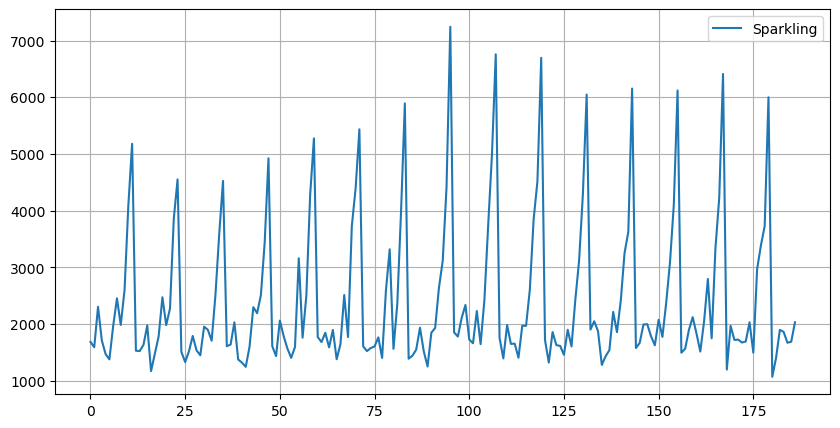

In [248]:
df.plot();
plt.grid()

#X axis is not time so we will timestamp it

In [249]:
date =pd.date_range(start= '1/1/1980', end = '8/1/1995', freq = 'M')

In [250]:
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [251]:
df['Timestamp'] = pd.DataFrame(date, columns=['YearMonth'])
df.head()

YearMonth  Sparkling  Timestamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

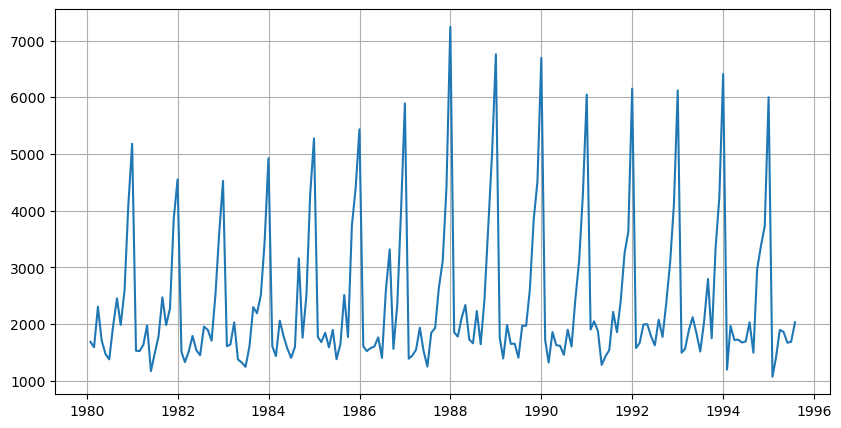

In [252]:
plt.plot(df['Timestamp'],df['Sparkling']);
plt.grid()

In [253]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [254]:
df2 = df.set_index('Timestamp')
df2.drop(['YearMonth'], axis=1, inplace=True)
df2.head()

Sparkling
Timestamp            
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

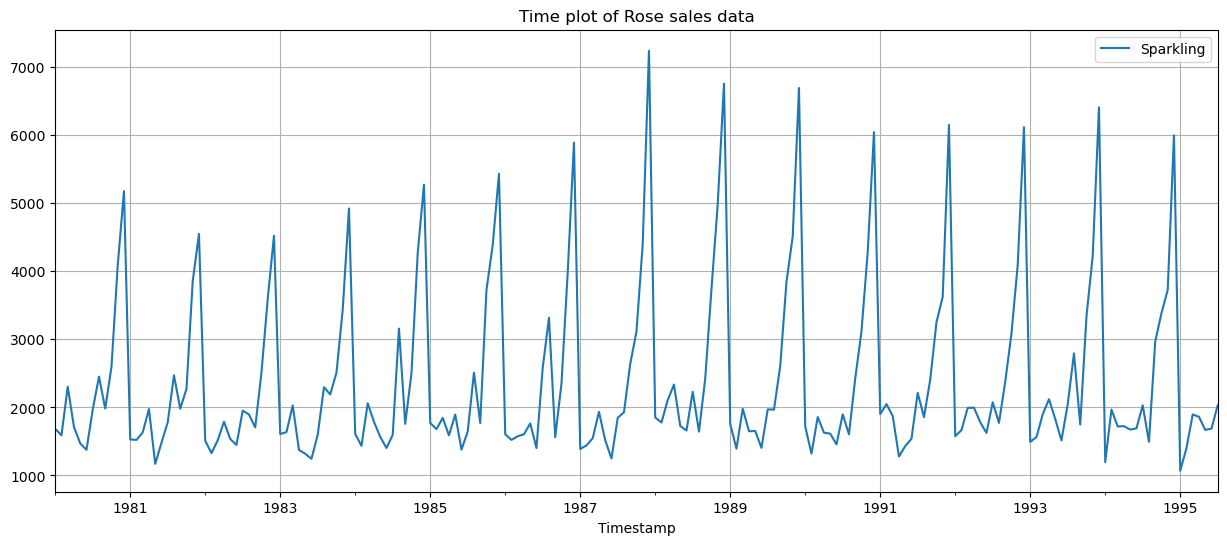

In [255]:
#plot the times seris plot 

# The following code is to set the subsequent figure sizes


from pylab import rcParams
rcParams['figure.figsize'] = 10,5



df2.plot(figsize=(15,6))
plt.title('Time plot of Rose sales data')
plt.grid();


In [256]:
#check nulll values which we will treate later
df2.isnull().sum()

Sparkling    0
dtype: int64

In [258]:
#using loc function to fund null values
null_rows = df2.loc[df2['Sparkling'].isnull() ]
null_rows

Empty DataFrame
Columns: [Sparkling]
Index: []

In [259]:
#Other way to check Null Values
Null=pd.isnull(df2['Sparkling'])
df2[Null]

Empty DataFrame
Columns: [Sparkling]
Index: []

# 2. Data Pre-processing
- Missing value treatment - Visualize the processed data - Train-test split


## Imputing the Missing Values
Here is the explanation of the techniques mentioned for handling missing values in time series data:

Mean Imputation: Replaces missing values with the average of the entire column. Simple and fast, but may not capture trends or local variations.

Median Imputation: Replaces missing values with the median of the entire column. Less sensitive to outliers than mean, but still lacks local context.

Last Observation Carried Forward (LOCF): Replaces missing values with the last known value. Works well for data with rising or constant trends, but can distort trends if they change direction.

Next Observation Carried Backward (NOCB): Replaces missing values with the next known value. Similar to LOCF but for downward trends. Both LOCF and NOCB can introduce artificial jumps or dips.

Linear Interpolation: Estimates missing values by drawing a straight line between the two nearest known data points. Good for capturing linear trends, but less accurate for complex patterns.

Spline Interpolation: Estimates missing values by fitting a flexible, curved line through the data points. More accurate for capturing complex trends and subtle changes than linear interpolation, but computationally more expensive.




### Since no null value found we will move forward 

In [260]:
df2.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

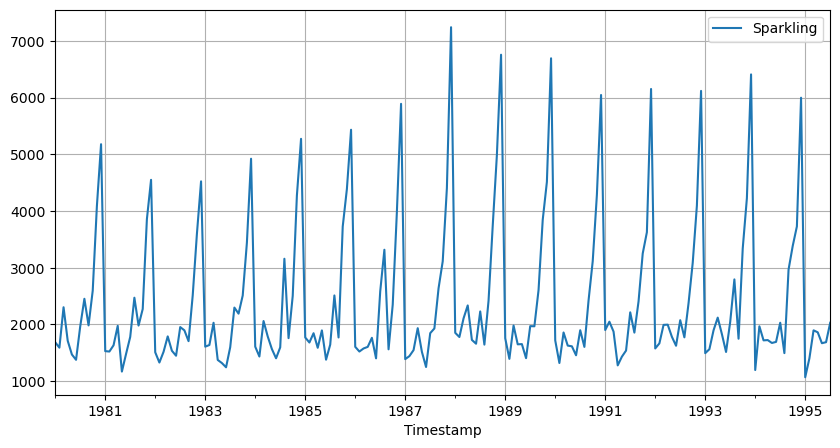

In [261]:
df2.plot();
plt.grid()


In [262]:
df.describe()

Sparkling                      Timestamp
count   187.000000                            187
mean   2402.417112  1987-10-30 19:15:04.812834240
min    1070.000000            1980-01-31 00:00:00
25%    1605.000000            1983-12-15 12:00:00
50%    1874.000000            1987-10-31 00:00:00
75%    2549.000000            1991-09-15 00:00:00
max    7242.000000            1995-07-31 00:00:00
std    1295.111540                            NaN

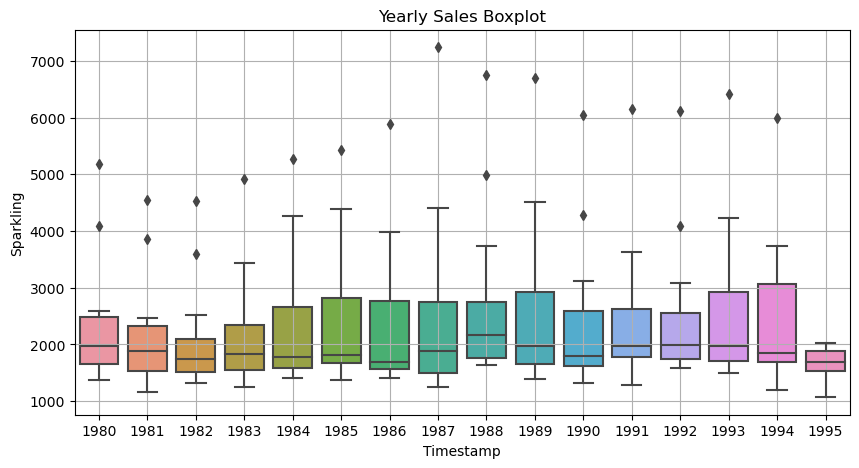

In [263]:
#Yearly boxplot 
sns.boxplot(x = df2.index.year,y = df2['Sparkling'])
plt.title('Yearly Sales Boxplot')
plt.grid();

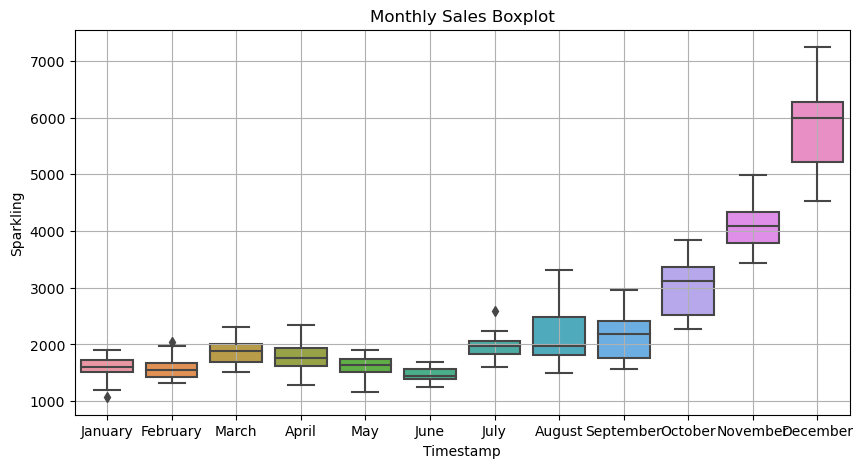

In [264]:
#monthly boxplot
sns.boxplot(x = df2.index.month_name(),y = df2['Sparkling'])
plt.title('Monthly Sales Boxplot')
plt.grid();

#Plot a time series monthplot to understand the spread of sales across different years and within different months across years.

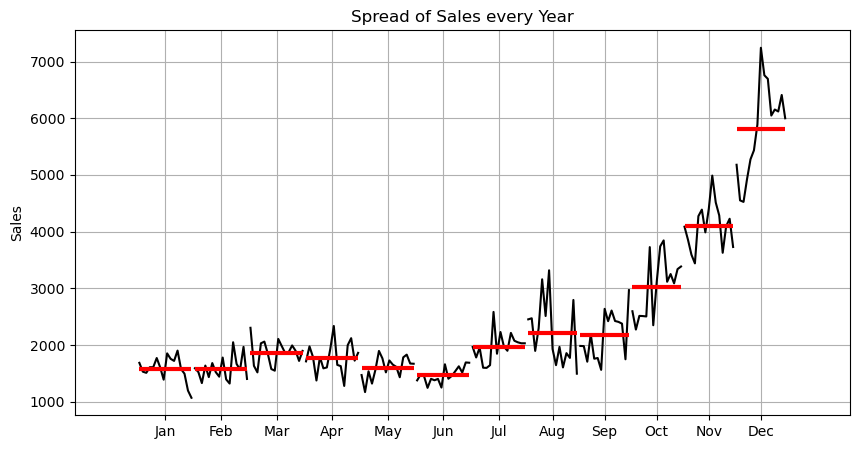

In [265]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df2['Sparkling'],ylabel='Sales')

plt.title('Spread of Sales every Year')
plt.grid();

In [266]:
# Plot graph of monthly sales accross years

monthly_sales_across_years = pd.pivot_table(df2, values = 'Sparkling', columns = df2.index.month_name(), index = df2.index.year)
monthly_sales_across_years

Timestamp   April  August  December  February  January    July    June  \
Timestamp                                                                
1980       1712.0  2453.0    5179.0    1591.0   1686.0  1966.0  1377.0   
1981       1976.0  2472.0    4551.0    1523.0   1530.0  1781.0  1480.0   
1982       1790.0  1897.0    4524.0    1329.0   1510.0  1954.0  1449.0   
1983       1375.0  2298.0    4923.0    1638.0   1609.0  1600.0  1245.0   
1984       1789.0  3159.0    5274.0    1435.0   1609.0  1597.0  1404.0   
1985       1589.0  2512.0    5434.0    1682.0   1771.0  1645.0  1379.0   
1986       1605.0  3318.0    5891.0    1523.0   1606.0  2584.0  1403.0   
1987       1935.0  1930.0    7242.0    1442.0   1389.0  1847.0  1250.0   
1988       2336.0  1645.0    6757.0    1779.0   1853.0  2230.0  1661.0   
1989       1650.0  1968.0    6694.0    1394.0   1757.0  1971.0  1406.0   
1990       1628.0  1605.0    6047.0    1321.0   1720.0  1899.0  1457.0   
1991       1279.0  1857.0    6153.0    2049.0   1902.0  2214.0  1540.0   
1992       1997.0  1773.0    6119.0    1667.0   1577.0  2076.0  1625.0   
1993       2121.0  2795.0    6410.0    1564.0   1494.0  2048.0  1515.0   
1994       1725.0  1495.0    5999.0    1968.0   1197.0  2031.0  1693.0   
1995       1862.0     NaN       NaN    1402.0   1070.0  2031.0  1688.0   

Timestamp   March     May  November  October  September  
Timestamp                                                
1980       2304.0  1471.0    4087.0   2596.0     1984.0  
1981       1633.0  1170.0    3857.0   2273.0     1981.0  
1982       1518.0  1537.0    3593.0   2514.0     1706.0  
1983       2030.0  1320.0    3440.0   2511.0     2191.0  
1984       2061.0  1567.0    4273.0   2504.0     1759.0  
1985       1846.0  1896.0    4388.0   3727.0     1771.0  
1986       1577.0  1765.0    3987.0   2349.0     1562.0  
1987       1548.0  1518.0    4405.0   3114.0     2638.0  
1988       2108.0  1728.0    4988.0   3740.0     2421.0  
1989       1982.0  1654.0    4514.0   3845.0     2608.0  
1990       1859.0  1615.0    4286.0   3116.0     2424.0  
1991       1874.0  1432.0    3627.0   3252.0     2408.0  
1992       1993.0  1783.0    4096.0   3088.0     2377.0  
1993       1898.0  1831.0    4227.0   3339.0     1749.0  
1994       1720.0  1674.0    3729.0   3385.0     2968.0  
1995       1897.0  1670.0       NaN      NaN        NaN

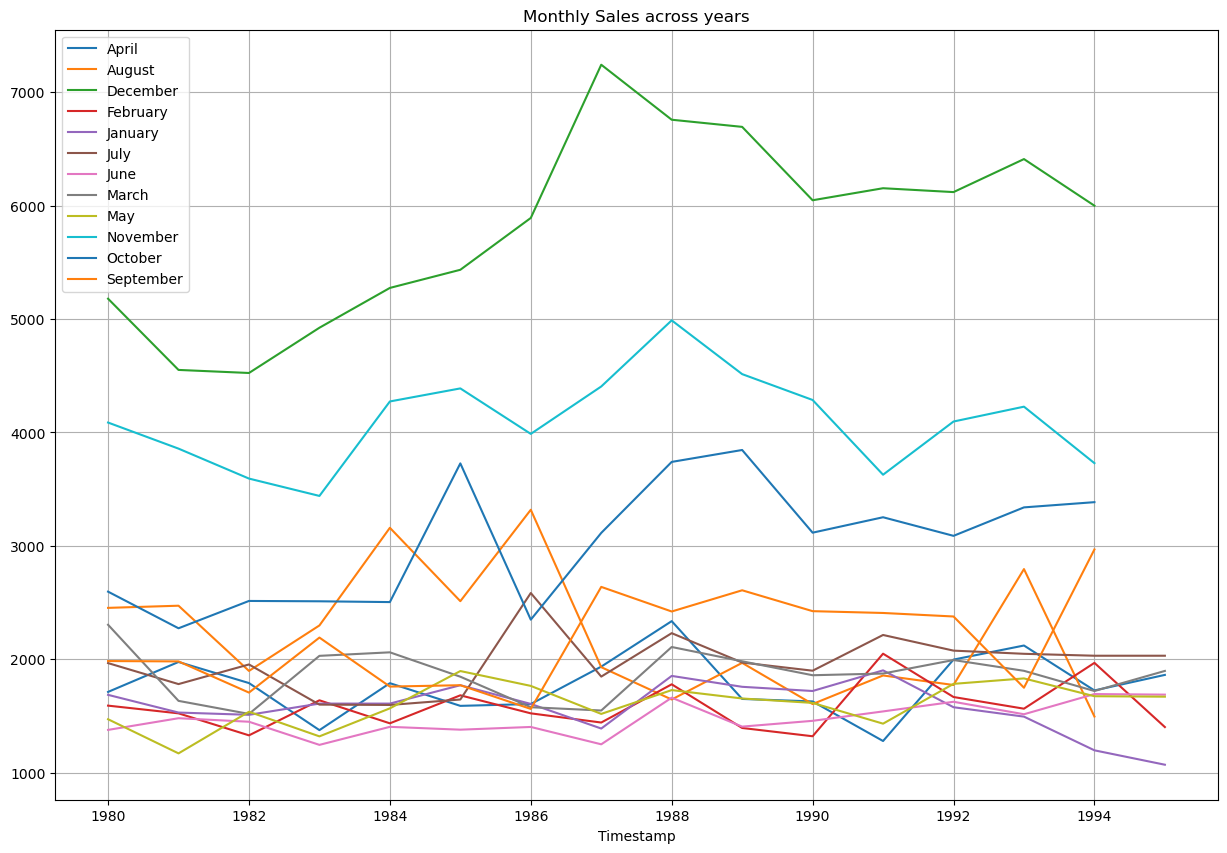

In [267]:
monthly_sales_across_years.plot(figsize=(15,10))
plt.grid()
plt.title('Monthly Sales across years')
plt.legend(loc='best');

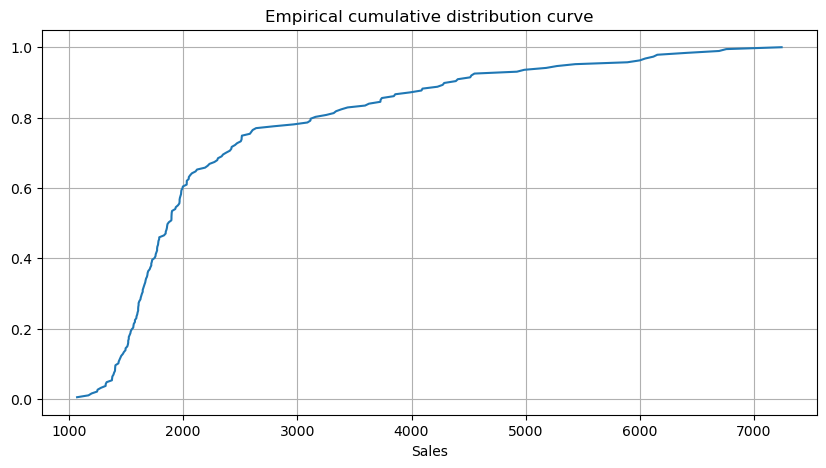

In [268]:
# plot empirical cumulative distribution

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (10, 5))
cdf = ECDF(df2['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales')
plt.title('Empirical cumulative distribution curve');

In [269]:
# Decompose time series

from    statsmodels.tsa.seasonal import   seasonal_decompose

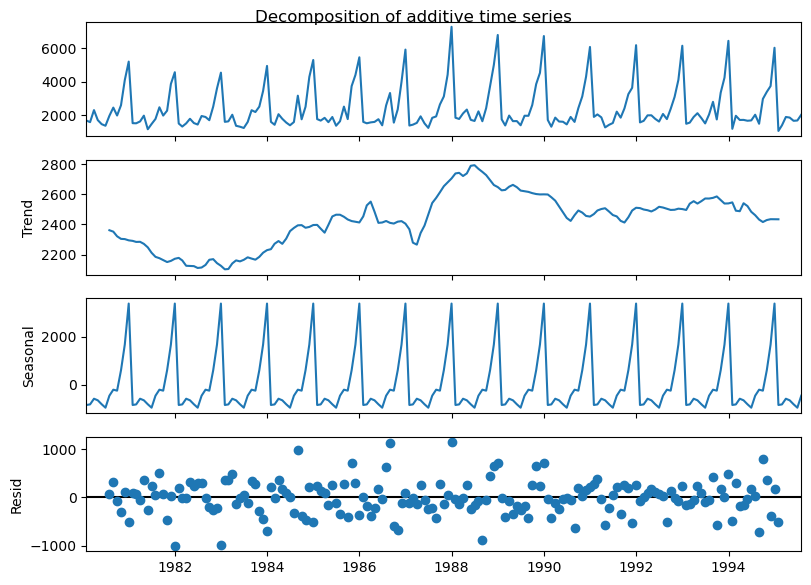

In [270]:
decomposition = seasonal_decompose(df2,model='additive')

fig = decomposition.plot()
fig.set_figwidth(8)
fig.set_figheight(6)
fig.suptitle('Decomposition of additive time series')
plt.show()

In [271]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.round(2).head(12),'\n')
print('Seasonality','\n',seasonality.round(2).head(12),'\n')
print('Residual','\n',residual.round(2).head(12),'\n')

Trend 
 Timestamp
1980-01-31        NaN
1980-02-29        NaN
1980-03-31        NaN
1980-04-30        NaN
1980-05-31        NaN
1980-06-30        NaN
1980-07-31    2360.67
1980-08-31    2351.33
1980-09-30    2320.54
1980-10-31    2303.58
1980-11-30    2302.04
1980-12-31    2293.79
Name: trend, dtype: float64 

Seasonality 
 Timestamp
1980-01-31    -854.26
1980-02-29    -830.35
1980-03-31    -592.36
1980-04-30    -658.49
1980-05-31    -824.42
1980-06-30    -967.43
1980-07-31    -465.50
1980-08-31    -214.33
1980-09-30    -254.68
1980-10-31     599.77
1980-11-30    1675.07
1980-12-31    3386.98
Name: seasonal, dtype: float64 

Residual 
 Timestamp
1980-01-31       NaN
1980-02-29       NaN
1980-03-31       NaN
1980-04-30       NaN
1980-05-31       NaN
1980-06-30       NaN
1980-07-31     70.84
1980-08-31    316.00
1980-09-30    -81.86
1980-10-31   -307.35
1980-11-30    109.89
1980-12-31   -501.78
Name: resid, dtype: float64 



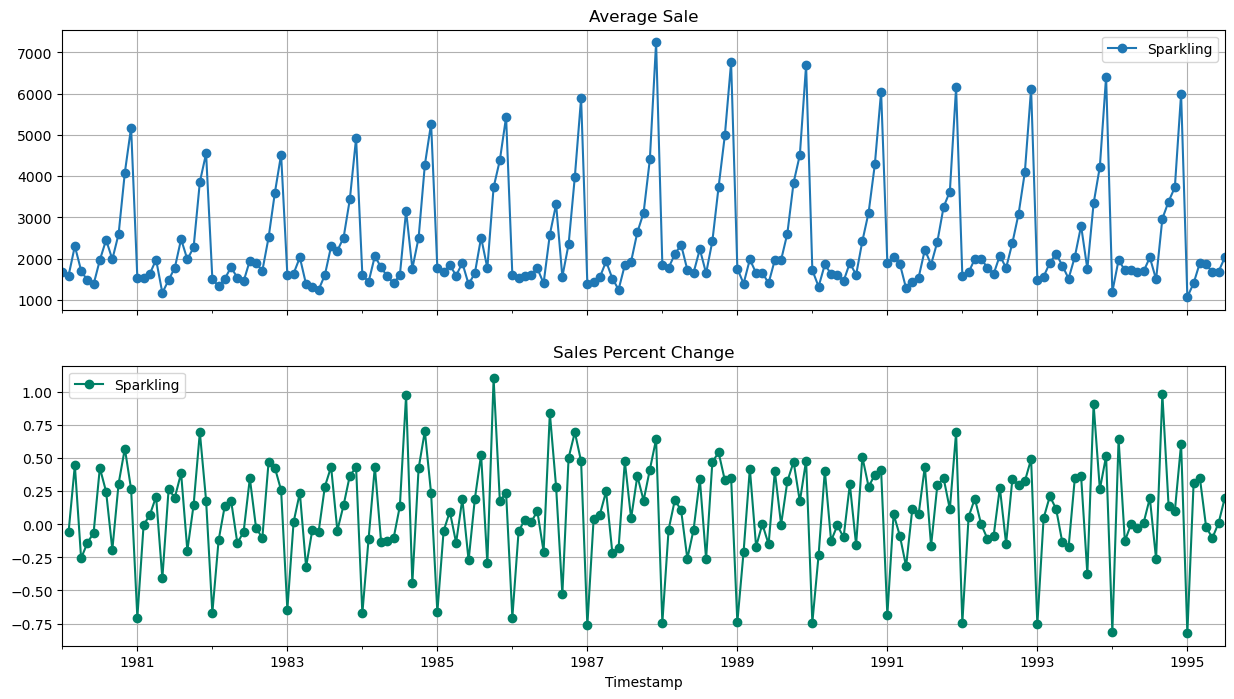

In [272]:
# group by date and get average RetailSales, and precent change
average    = df2.groupby(df2.index)["Sparkling"].mean()
pct_change = df2.groupby(df2.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sale",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

In [273]:
#Test Train split

train    =   df2[0:int(len(df)*0.7)] 
test     =   df2[int(len(df)*0.7):]

In [274]:
print(train.shape)
print(test.shape)

(130, 1)
(57, 1)


In [275]:
train.isnull().sum()

Sparkling    0
dtype: int64

In [276]:
test.isnull().sum()

Sparkling    0
dtype: int64

In [277]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
             Sparkling
Timestamp            
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471 

Last few rows of Training Data 
             Sparkling
Timestamp            
1990-06-30       1457
1990-07-31       1899
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116 

First few rows of Test Data 
             Sparkling
Timestamp            
1990-11-30       4286
1990-12-31       6047
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874 

Last few rows of Test Data 
             Sparkling
Timestamp            
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031 



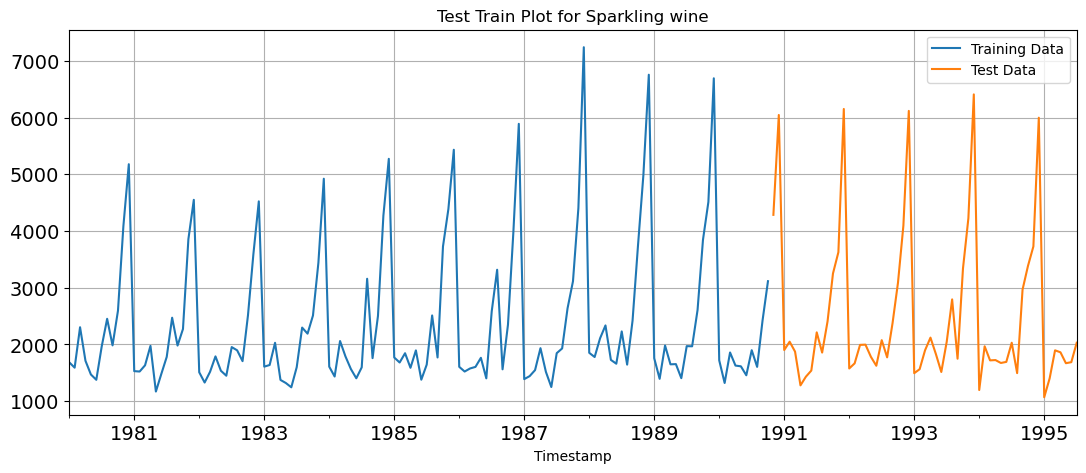

In [278]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.title('Test Train Plot for Sparkling wine')
plt.legend(['Training Data','Test Data'])
plt.show()

# 3. Model Building - Original Data
- Build forecasting models - Linear regression - Simple Average - Moving Average - Exponential Models (Single, Double, Triple) - Check the performance of the models built


In [279]:
# LINER REGRESSION MODEL



train_time = [i+1 for i in range(len(train))]
test_time = [i+57 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
Test Time instance 
 [57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113]


In [280]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [281]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Timestamp                  
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Timestamp                  
1990-06-30       1457   126
1990-07-31       1899   127
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130 

First few rows of Test Data 
             Sparkling  time
Timestamp                  
1990-11-30       4286    57
1990-12-31       6047    58
1991-01-31       1902    59
1991-02-28       2049    60
1991-03-31       1874    61 

Last few rows of Test Data 
             Sparkling  time
Timestamp                  
1995-03-31       1897   109
1995-04-30       1862   110
1995-05-31       1670   111
1995-06-30       1688   112
1995-07-31       2031   113 




Now that our training and test data has been modified, let us go ahead use  LinearRegression_ to build the model on the training data and test the model on the test data.



In [282]:
from sklearn.linear_model import LinearRegression

In [283]:
lr = LinearRegression()

In [284]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

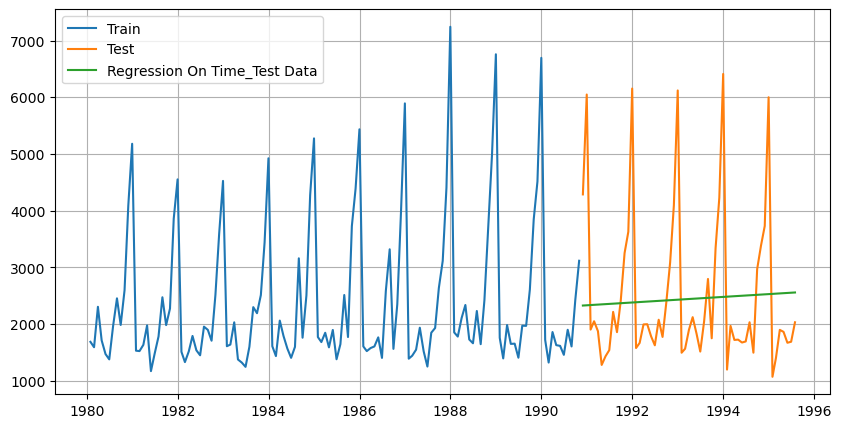

In [285]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(10,5))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [286]:
# Defining accuracy metrics

from sklearn import metrics

In [287]:
# Model Evaluation

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1371.047 


In [288]:


resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  1371.046677

In [289]:
## Mean Absolute Percentage Error (MAPE) - Function Definition 
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100 

RMSE = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False) 

MAPE = mean_absolute_percentage_error(test['Sparkling'],test_predictions_model1) 

resultsDf = pd.DataFrame({'Test RMSE': [RMSE],'Test MAPE':[MAPE]} ,index=['Regression on Time']) 

resultsDf

Test RMSE  Test MAPE
Regression on Time  1371.046677  41.090158

In [290]:
# Method 2: Simple Average



SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [291]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
Timestamp                           
1990-11-30       4286    2361.276923
1990-12-31       6047    2361.276923
1991-01-31       1902    2361.276923
1991-02-28       2049    2361.276923
1991-03-31       1874    2361.276923

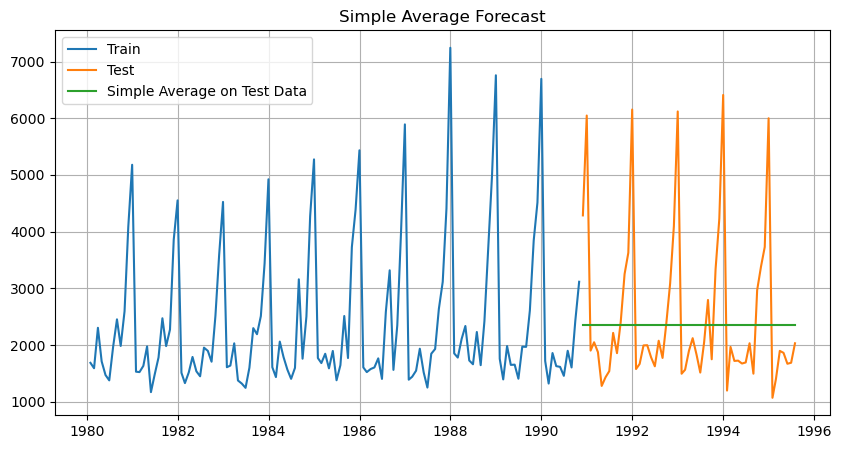

In [292]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [293]:
#model evaluation

rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Simple Average forecast on the Test Data,  RMSE is 1368.747


In [294]:

MAPE = mean_absolute_percentage_error(test['Sparkling'],SimpleAverage_test['mean_forecast']) 

resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test],'Test MAPE':[MAPE]} ,index=['SimpleAverageModel']) 
resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE  Test MAPE
Regression on Time  1371.046677  41.090158
SimpleAverageModel  1368.746717  38.220166

#### Moving Average Model: 
For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.
For Moving Average, we are going to average over the entire data.

In [295]:
MovingAverage = df2.copy()
MovingAverage.head()

Sparkling
Timestamp            
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [296]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Timestamp                                                            
1980-01-31       1686         NaN         NaN         NaN         NaN
1980-02-29       1591      1638.5         NaN         NaN         NaN
1980-03-31       2304      1947.5         NaN         NaN         NaN
1980-04-30       1712      2008.0     1823.25         NaN         NaN
1980-05-31       1471      1591.5     1769.50         NaN         NaN

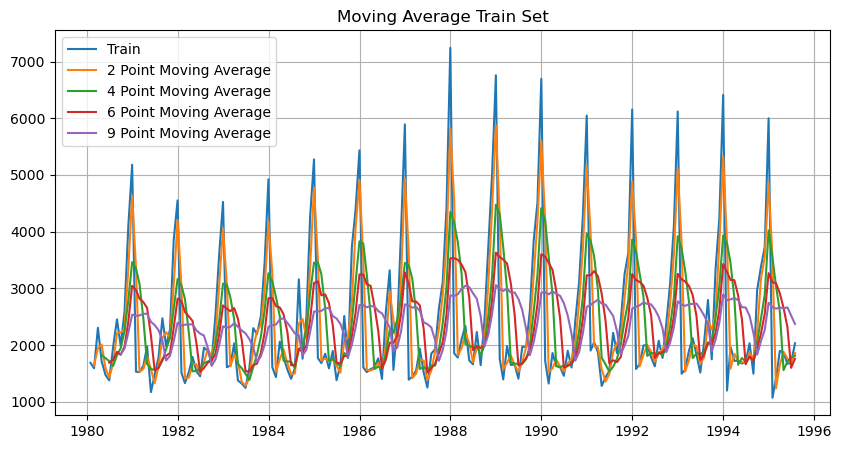

In [297]:
## Plotting on the whole data

plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.title( 'Moving Average Train Set')
plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [298]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

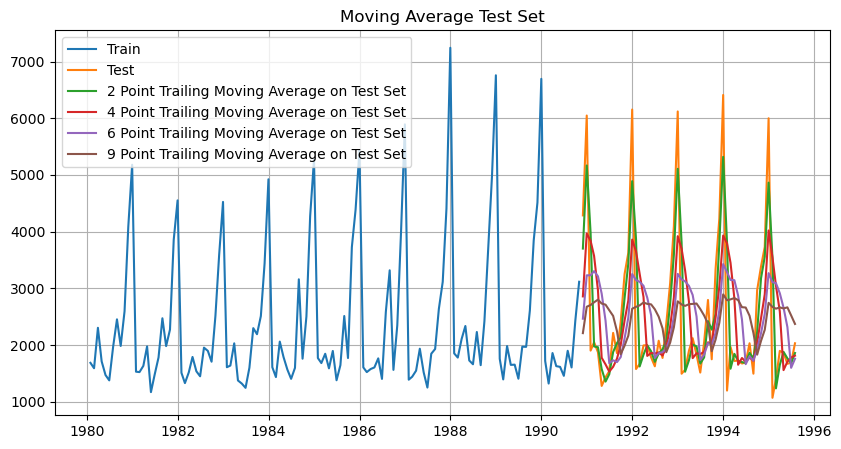

In [299]:
## Plotting on both the Training and Test data

plt.figure(figsize=(10,5))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.title( 'Moving Average Test Set')
plt.legend(loc = 'best')
plt.grid();

Model Evaluation

In [300]:

## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 811.179
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1184.213
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1337.201
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1422.653


In [301]:
MAPE_model4_test2 = mean_absolute_percentage_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2']) 
MAPE_model4_test4 = mean_absolute_percentage_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'])
MAPE_model4_test6 = mean_absolute_percentage_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'])
MAPE_model4_test9 = mean_absolute_percentage_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'])



print ('MAPE_model4_test2:', round(MAPE_model4_test2,2))

MAPE_model4_test2: 24.34


In [302]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9], 
                            'Test MAPE':[MAPE_model4_test2,MAPE_model4_test4,MAPE_model4_test6,MAPE_model4_test9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE  Test MAPE
Regression on Time           1371.046677  41.090158
SimpleAverageModel           1368.746717  38.220166
2pointTrailingMovingAverage   811.178937  24.339202
4pointTrailingMovingAverage  1184.213295  40.829842
6pointTrailingMovingAverage  1337.200524  48.265138
9pointTrailingMovingAverage  1422.653281  50.142725

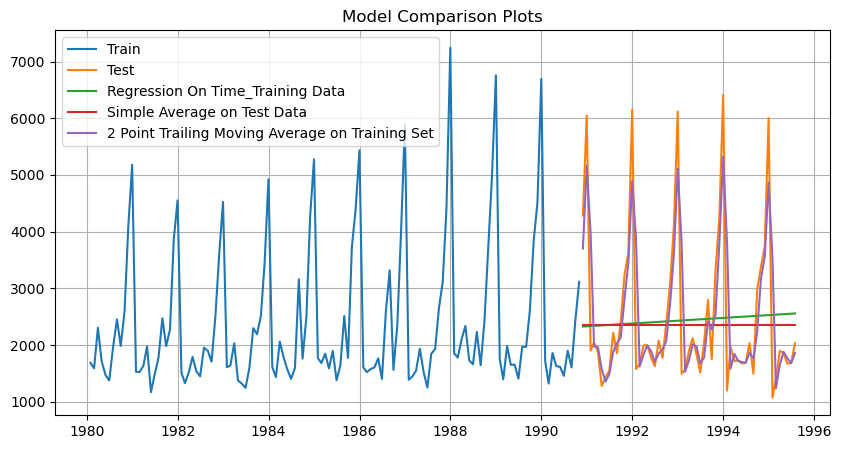

In [303]:
## Plotting on both Training and Test data

plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

### Smiple Exponential smoothening

In [304]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [305]:
SES_train = train.copy()
SES_test = test.copy()

In [306]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

In [307]:
model_SES_autofit = model_SES.fit(optimized=True)

In [308]:
model_SES_autofit.params

{'smoothing_level': 0.037534298998536025,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [309]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Sparkling      predict
Timestamp                         
1990-11-30       4286  2465.235698
1990-12-31       6047  2465.235698
1991-01-31       1902  2465.235698
1991-02-28       2049  2465.235698
1991-03-31       1874  2465.235698

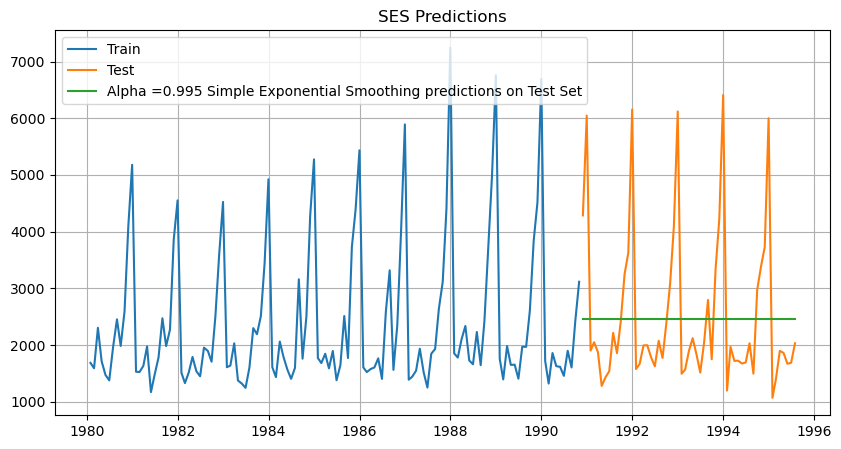

In [310]:
## Plotting on both the Training and Test data

plt.figure(figsize=(10,5))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('SES Predictions');

In [311]:
# Model evaluation for alpha=.995
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1362.429


In [312]:
mape_model5_test_1 = mean_absolute_percentage_error(SES_test['Sparkling'],SES_test['predict']) 




print ('MAPE Value is', round(MAPE_model4_test2,2))

MAPE Value is 24.34


In [313]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1], 'Test MAPE':[mape_model5_test_1] },index=['Alpha=0.995,SimpleExponentialSmoothing'])


resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE  Test MAPE
Regression on Time                      1371.046677  41.090158
SimpleAverageModel                      1368.746717  38.220166
2pointTrailingMovingAverage              811.178937  24.339202
4pointTrailingMovingAverage             1184.213295  40.829842
6pointTrailingMovingAverage             1337.200524  48.265138
9pointTrailingMovingAverage             1422.653281  50.142725
Alpha=0.995,SimpleExponentialSmoothing  1362.428949  41.738544

Setting different alpha values.
Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.
We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

### Double Exponential Smoothening

In [314]:
DES_train = train.copy()
DES_test = test.copy()


In [315]:
model_DES = Holt(DES_train['Sparkling'])

In [316]:
model_DES_autofit = model_DES.fit(optimized=True)
model_DES_autofit.params

{'smoothing_level': 0.6414285714285713,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [317]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

Sparkling      predict
Timestamp                         
1990-11-30       4286  2623.902015
1990-12-31       6047  2530.231452
1991-01-31       1902  2436.560888
1991-02-28       2049  2342.890325
1991-03-31       1874  2249.219761

In [318]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [319]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=57)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        
        mape_model6_train = mean_absolute_percentage_error(DES_train['Sparkling'],DES_train['predict',i,j]) 
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        mape_model6_test = mean_absolute_percentage_error(DES_test['Sparkling'],DES_test['predict',i,j]) 
        
        
        resultsDf_7 = resultsDf_7._append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train ,
                                           'Test RMSE':rmse_model6_test, 'Train MAPE':mape_model6_train,
                                          'Test MAPE':mape_model6_test }, ignore_index=True)

In [320]:
resultsDf_7

Alpha Values  Beta Values   Train RMSE     Test RMSE  Train MAPE  \
0            0.3          0.3  1567.524066   1597.853999   57.689096   
1            0.3          0.4  1662.549225   4023.672164   62.389777   
2            0.3          0.5  1758.543876   8879.172380   66.926242   
3            0.3          0.6  1843.560670  15645.080035   71.730324   
4            0.3          0.7  1902.735965  23205.442323   75.752581   
..           ...          ...          ...           ...         ...   
59           1.0          0.6  1764.658812  20558.025827   59.245171   
60           1.0          0.7  1837.425218  22155.074151   62.952809   
61           1.0          0.8  1915.148280  23241.839479   66.417351   
62           1.0          0.9  1999.362743  23787.747852   69.529926   
63           1.0          1.0  2092.531564  23712.944127   72.363587   

      Test MAPE  
0     61.411661  
1    181.298982  
2    395.818611  
3    691.676215  
4   1022.231965  
..          ...  
59   918.000920  
60   987.402901  
61  1034.618530  
62  1058.333097  
63  1055.083691  

[64 rows x 6 columns]

In [321]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values   Train RMSE    Test RMSE  Train MAPE  \
0            0.3          0.3  1567.524066  1597.853999   57.689096   
1            0.3          0.4  1662.549225  4023.672164   62.389777   
8            0.4          0.3  1556.795694  5049.478887   55.127865   
16           0.5          0.3  1525.615506  7817.569799   51.923389   
2            0.3          0.5  1758.543876  8879.172380   66.926242   

     Test MAPE  
0    61.411661  
1   181.298982  
8   231.607054  
16  356.814130  
2   395.818611

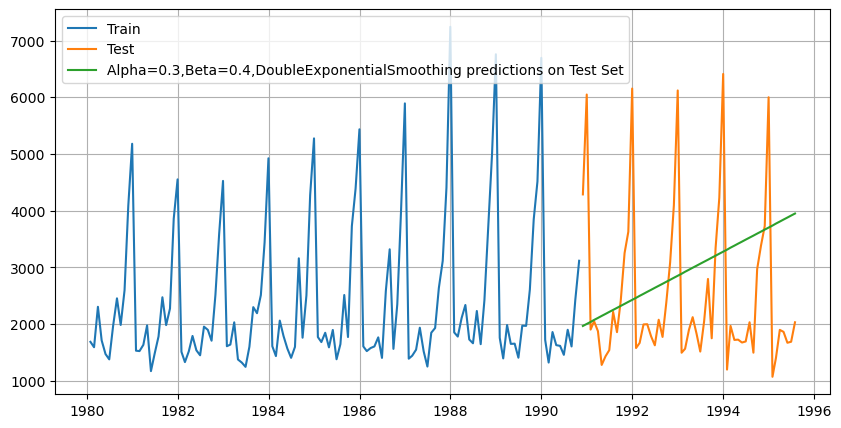

In [322]:
## Plotting on both the Training and Test data

plt.figure(figsize=(10,5))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.4,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [323]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0,3]],
                              'Test MAPE': [resultsDf_7.sort_values(by=['Test MAPE']).values[0,5]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE  Test MAPE
Regression on Time                             1371.046677  41.090158
SimpleAverageModel                             1368.746717  38.220166
2pointTrailingMovingAverage                     811.178937  24.339202
4pointTrailingMovingAverage                    1184.213295  40.829842
6pointTrailingMovingAverage                    1337.200524  48.265138
9pointTrailingMovingAverage                    1422.653281  50.142725
Alpha=0.995,SimpleExponentialSmoothing         1362.428949  41.738544
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing  1597.853999  61.411661

## Method 5: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [324]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


TES_train = train.copy()
TES_test = test.copy()

In [325]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

In [326]:
model_TES_autofit = model_TES.fit()

In [327]:
model_TES_autofit.params

{'smoothing_level': 0.07571432471504627,
 'smoothing_trend': 0.06489794789923221,
 'smoothing_seasonal': 0.3765611795178487,
 'damping_trend': nan,
 'initial_level': 2356.5416847960546,
 'initial_trend': -9.182360270735833,
 'initial_seasons': array([0.71216394, 0.67829895, 0.89649052, 0.79723125, 0.64100433,
        0.63985644, 0.86674058, 1.1133546 , 0.89819179, 1.18511974,
        1.83459596, 2.32779881]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [328]:
## Prediction on the test data

TES_test['Predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Sparkling      Predict
Timestamp                         
1990-11-30       4286  4327.606504
1990-12-31       6047  6208.854292
1991-01-31       1902  1621.602282
1991-02-28       2049  1379.868255
1991-03-31       1874  1791.914776

In [329]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [330]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['Predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['Predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=57)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['Predict',i,j,k],squared=False)
            
            mape_model8_train = mean_absolute_percentage_error(TES_train['Sparkling'],TES_train['Predict',i,j,k])
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['Predict',i,j,k],squared=False)
            
            mape_model8_test = mean_absolute_percentage_error(TES_train['Sparkling'],TES_train['Predict',i,j,k])
            
            resultsDf_8_2 = resultsDf_8_2._append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k, 
                                                   'Train RMSE':rmse_model8_train,'Train MAPE':mape_model8_train,
                                                   'Test RMSE':rmse_model8_test, 'Test MAPE': mape_model8_test 
                                                  }, ignore_index=True)

In [331]:
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values    Train RMSE     Test RMSE  \
0             0.3          0.3           0.3  3.923714e+02  2.355322e+03   
1             0.3          0.3           0.4  3.970733e+02  2.855432e+03   
2             0.3          0.3           0.5  4.091670e+02  3.193451e+03   
3             0.3          0.3           0.6  4.304007e+02  3.423716e+03   
4             0.3          0.3           0.7  4.631866e+02  3.615456e+03   
..            ...          ...           ...           ...           ...   
507           1.0          1.0           0.6  1.897409e+05  5.807913e+03   
508           1.0          1.0           0.7  2.680381e+05  3.585079e+05   
509           1.0          1.0           0.8  1.110365e+06  2.855947e+06   
510           1.0          1.0           0.9  7.751842e+04  7.857850e+04   
511           1.0          1.0           1.0  2.466982e+04  1.354272e+05   

      Train MAPE    Test MAPE  
0      11.987599    11.987599  
1      12.028562    12.028562  
2      12.227823    12.227823  
3      12.679615    12.679615  
4      13.495061    13.495061  
..           ...          ...  
507  1333.257868  1333.257868  
508   931.712903   931.712903  
509  3658.628317  3658.628317  
510  1536.696358  1536.696358  
511   472.033813   472.033813  

[512 rows x 7 columns]

In [332]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE  \
264           0.7          0.4           0.3  512.023844  422.908833   
144           0.5          0.5           0.3  472.088500  451.601686   
169           0.5          0.8           0.4  625.557444  481.151676   
200           0.6          0.4           0.3  479.344459  498.796626   
328           0.8          0.4           0.3  544.126424  502.371290   

     Train MAPE  Test MAPE  
264   15.016731  15.016731  
144   14.177021  14.177021  
169   16.581565  16.581565  
200   14.327730  14.327730  
328   15.813304  15.813304

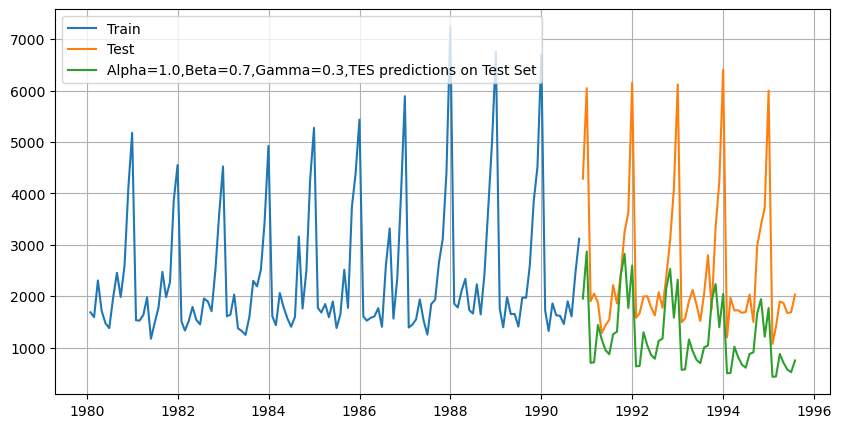

In [333]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(10,5))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['Predict', 1.0000000000000002, 0.7000000000000002, 0.3], label='Alpha=1.0,Beta=0.7,Gamma=0.3,TES predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [334]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]],
                              'Test MAPE':[resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][6]]}
                           ,index=['Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE  Test MAPE
Regression on Time                                  1371.046677  41.090158
SimpleAverageModel                                  1368.746717  38.220166
2pointTrailingMovingAverage                          811.178937  24.339202
4pointTrailingMovingAverage                         1184.213295  40.829842
6pointTrailingMovingAverage                         1337.200524  48.265138
9pointTrailingMovingAverage                         1422.653281  50.142725
Alpha=0.995,SimpleExponentialSmoothing              1362.428949  41.738544
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       1597.853999  61.411661
Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialS...   422.908833  15.016731

In [335]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE  Test MAPE
Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialS...   422.908833  15.016731
2pointTrailingMovingAverage                          811.178937  24.339202
4pointTrailingMovingAverage                         1184.213295  40.829842
6pointTrailingMovingAverage                         1337.200524  48.265138
Alpha=0.995,SimpleExponentialSmoothing              1362.428949  41.738544
SimpleAverageModel                                  1368.746717  38.220166
Regression on Time                                  1371.046677  41.090158
9pointTrailingMovingAverage                         1422.653281  50.142725
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       1597.853999  61.411661

For this data, we had both trend and seasonality so by definition Triple Exponential Smoothing is supposed to work better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing. However, since this was a model building exercise we had gone on to build different models on the data and have compared these model with the best RMSE value on the test data.

In [336]:
rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 811.179


0:00:00.030502


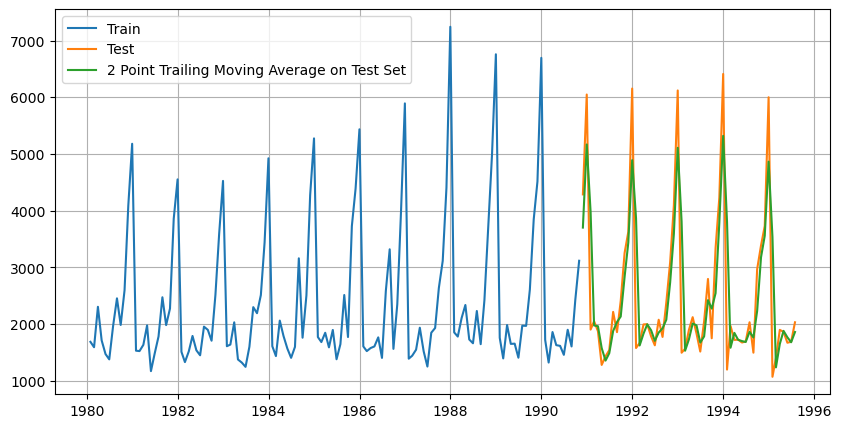

In [337]:
start = datetime.now()
plt.figure(figsize=(10,5))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

#plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

end=datetime.now()

print(end-start)

In [338]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


## 4. Check for Stationarity
- Check for stationarity - Make the data stationary (if needed)


In [339]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

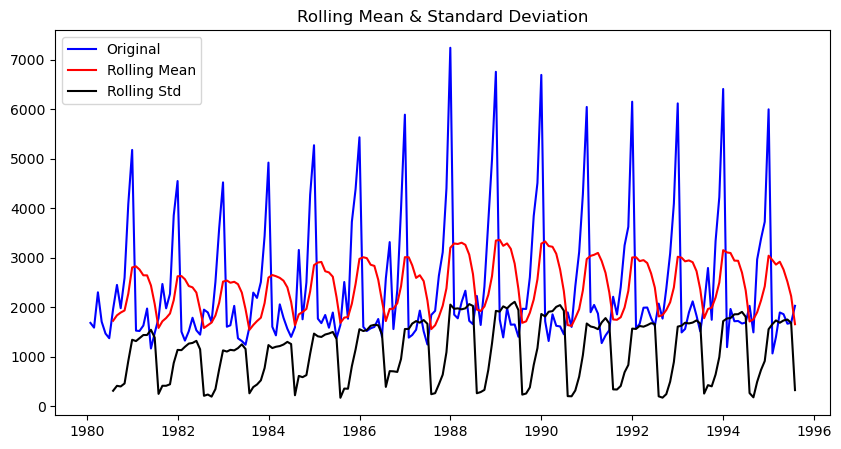

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [340]:
test_stationarity(df2['Sparkling'])

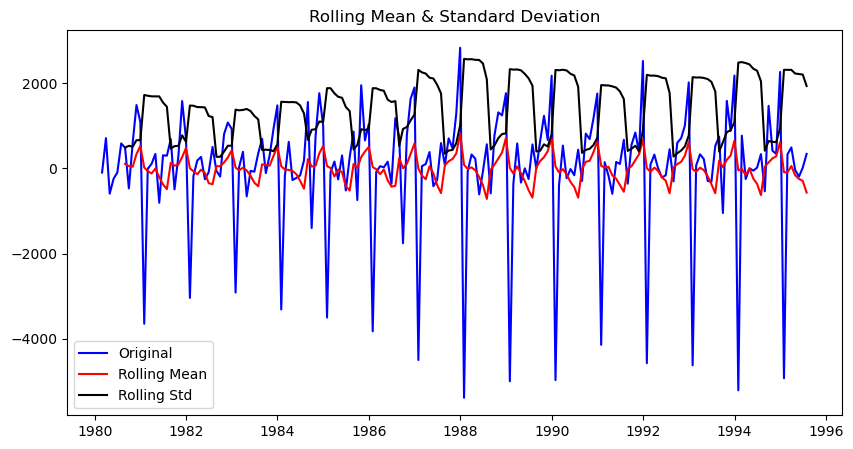

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [341]:
#time series is non stationary. Let us take a difference of order 1 and check whether the Time Series is stationary or not.

test_stationarity(df2['Sparkling'].diff().dropna())



Text(0, 0.5, 'Sparkling')

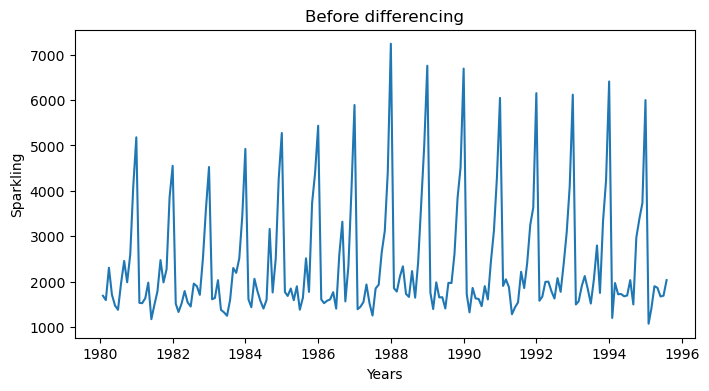

In [342]:
#Non differenced plot
plt.figure(figsize=(8, 4))
plt.plot(df2)
plt.xlabel('Years')
plt.title('Before differencing')
plt.ylabel('Sparkling')

Text(0, 0.5, 'Sparkling')

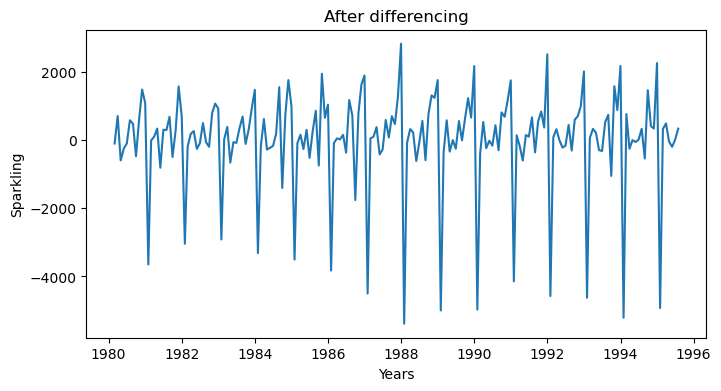

In [343]:
#after d=1 differencing done

plt.figure(figsize=(8, 4))
plt.plot(df2.diff(periods=1))
plt.title('After differencing')
plt.xlabel('Years')
plt.ylabel('Sparkling')

Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.
    
The p value is insignificant. We reject null hypotheisis and conclude time series to be stationary after differencing with d=1

In [344]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 130 entries, 1980-01-31 to 1990-10-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  130 non-null    int64
dtypes: int64(1)
memory usage: 2.0 KB


## 5. Model Building - Stationary Data
- Generate ACF & PACF Plot and find the AR, MA values. - Build different ARIMA models - Auto ARIMA - Manual ARIMA - Build different SARIMA models - Auto SARIMA - Manual SARIMA - Check the performance of the models built


In [345]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 500x500 with 0 Axes>

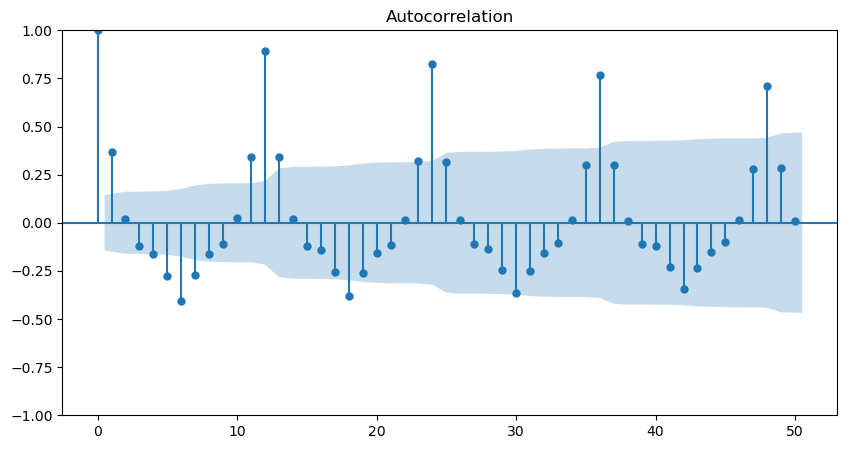

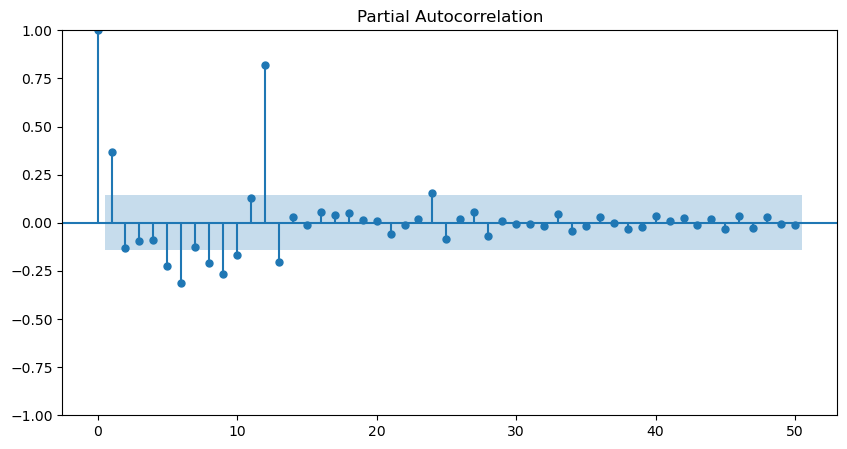

In [346]:
plt.figure(figsize=(5,5))
plot_acf(df2['Sparkling'],lags=50)
plot_pacf(df2['Sparkling'],lags=50)

plt.show()


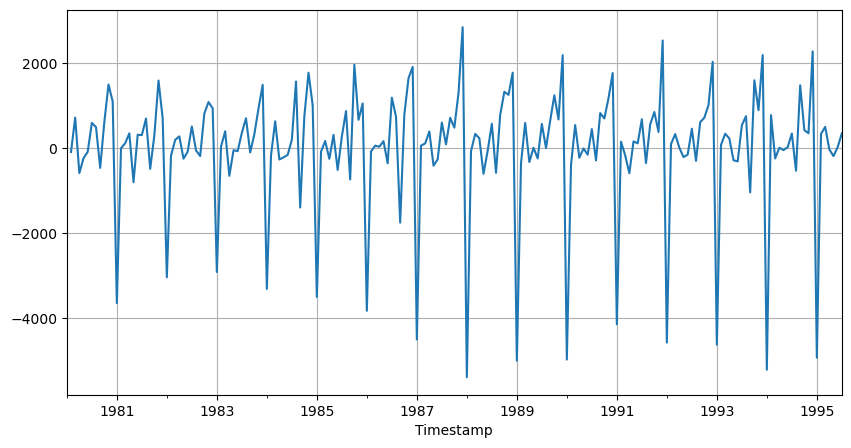

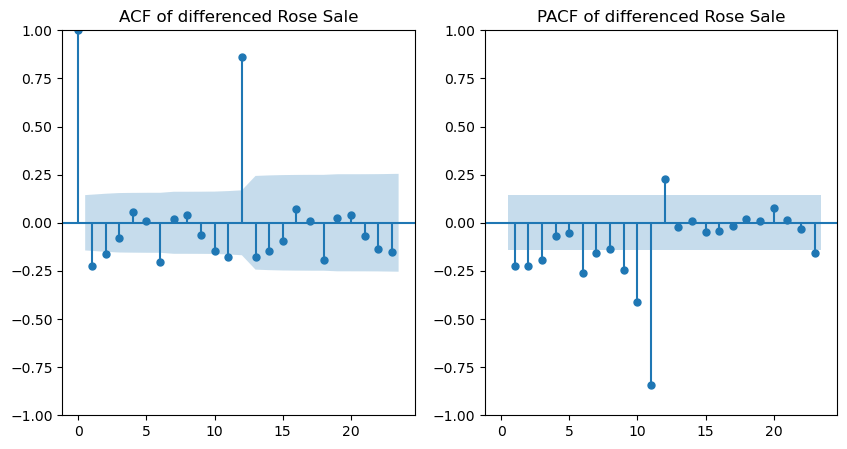

In [347]:
# Plot the first difference series, ACF and PACF of Log(Tractor Sales) 
df2['Sparkling'].diff().plot() 
plt.grid() 
# ACF and PACF after taking the differenced logarithmic transformation 
f,a = plt.subplots(1,2,sharex=True,sharey=False,squeeze=False) 
#Plotting the ACF and the PACF 
plot_0 = plot_acf(df2['Sparkling'].diff().dropna(),title='ACF of differenced Rose Sale',ax=a[0][0])
plot_1 = plot_pacf(df2['Sparkling'].diff().dropna(),title='PACF of differenced Rose Sale',zero = False,ax=a[0][1]);

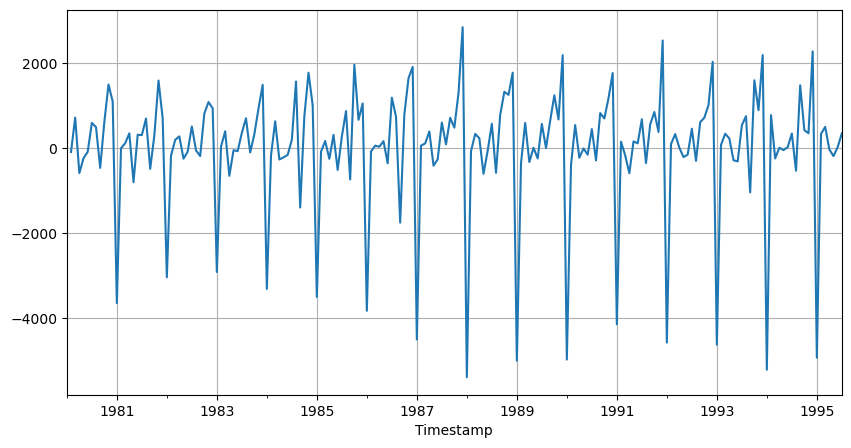

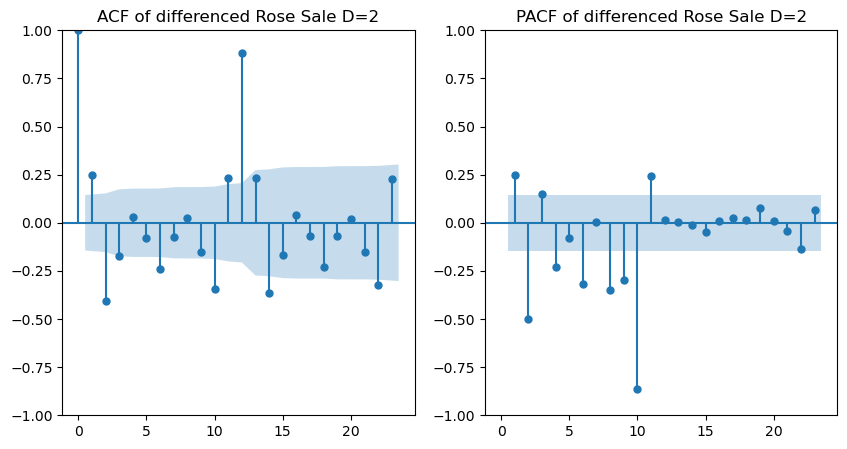

In [348]:
# Plot the first difference series, ACF and PACF of Log(Tractor Sales) 
df2['Sparkling'].diff().plot() 
plt.grid() 
# ACF and PACF after taking the differenced logarithmic transformation 
f,a = plt.subplots(1,2,sharex=True,sharey=False,squeeze=False) 
#Plotting the ACF and the PACF 
plot_0 = plot_acf(df2['Sparkling'].diff(2).dropna(),title='ACF of differenced Rose Sale D=2',ax=a[0][0])
plot_1 = plot_pacf(df2['Sparkling'].diff(2).dropna(),title='PACF of differenced Rose Sale D=2',zero = False,ax=a[0][1]);

pdq = 311 PDQ= 323

### Build an Automated version of an ARMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC)

In [349]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 0 as we necessary for an ARMA model 

import itertools
p = q = range(0, 3)
d= range(1)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)


In [350]:
# Creating an empty Dataframe with column names only
ARMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [351]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARMA_model.aic))
    ARMA_AIC = ARMA_AIC._append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)

ARIMA(0, 0, 0) - AIC:2228.4836604091106
ARIMA(0, 0, 1) - AIC:2204.8697988529457
ARIMA(0, 0, 2) - AIC:2206.1112074350813
ARIMA(1, 0, 0) - AIC:2207.5021008952044
ARIMA(1, 0, 1) - AIC:2206.142158237963
ARIMA(1, 0, 2) - AIC:2207.163048180553
ARIMA(2, 0, 0) - AIC:2204.8807219201435
ARIMA(2, 0, 1) - AIC:2197.084442106501
ARIMA(2, 0, 2) - AIC:2208.1208886931827


In [352]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
7  (2, 0, 1)  2197.084442
1  (0, 0, 1)  2204.869799
6  (2, 0, 0)  2204.880722
2  (0, 0, 2)  2206.111207
4  (1, 0, 1)  2206.142158
5  (1, 0, 2)  2207.163048
3  (1, 0, 0)  2207.502101
8  (2, 0, 2)  2208.120889
0  (0, 0, 0)  2228.483660

In [353]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(3,1,1),freq='M')

results_auto_ARIMA = manual_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  130
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -1092.870
Date:                Mon, 22 Jul 2024   AIC                           2195.740
Time:                        19:37:03   BIC                           2210.039
Sample:                    01-31-1980   HQIC                          2201.550
                         - 10-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4780      0.104      4.580      0.000       0.273       0.683
ar.L2         -0.1561      0.199     -0.784      0.433      -0.546       0.234
ar.L3         -0.0426      0.190     -0.224      0.8

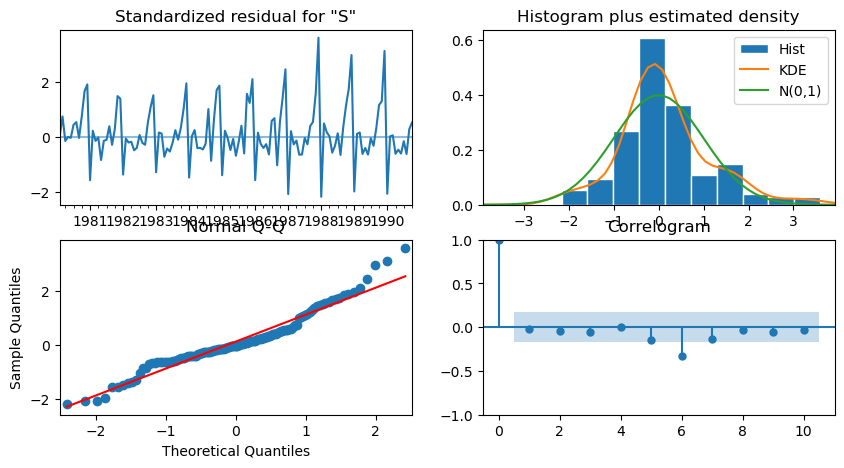

In [354]:
results_auto_ARIMA.plot_diagnostics()
plt.show()

In [355]:
#Predict on the Test Set using this model and evaluate the model
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [356]:
from sklearn.metrics import  mean_squared_error
rmse_arma = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
mape_arma = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_ARIMA)
print(rmse_arma.round(2), mape_arma.round(2))

1357.77 37.59


In [357]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_arma], 'Test MAPE': [mape_arma]}
                           ,index=['Manual ARIMA(3,1,1)'])


resultsDf = pd.concat([resultsDf])
resultsDf


Test RMSE  Test MAPE
Manual ARIMA(3,1,1)  1357.765923  37.590342

Note: the best model for ARMA is an AR MODEL as AR(1,0,2)


## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC)

In [358]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [359]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [360]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC._append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2232.719438106631
ARIMA(0, 1, 1) - AIC:2217.9392215777407
ARIMA(0, 1, 2) - AIC:2194.034361361615
ARIMA(1, 1, 0) - AIC:2231.137663012458
ARIMA(1, 1, 1) - AIC:2196.050085997568
ARIMA(1, 1, 2) - AIC:2194.959653392053
ARIMA(2, 1, 0) - AIC:2223.899470277437
ARIMA(2, 1, 1) - AIC:2193.9749624358974
ARIMA(2, 1, 2) - AIC:2178.1097266792094


In [361]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2178.109727
7  (2, 1, 1)  2193.974962
2  (0, 1, 2)  2194.034361
5  (1, 1, 2)  2194.959653
4  (1, 1, 1)  2196.050086
1  (0, 1, 1)  2217.939222
6  (2, 1, 0)  2223.899470
3  (1, 1, 0)  2231.137663
0  (0, 1, 0)  2232.719438

In [362]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  130
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1084.055
Date:                Mon, 22 Jul 2024   AIC                           2178.110
Time:                        19:37:05   BIC                           2192.409
Sample:                    01-31-1980   HQIC                          2183.920
                         - 10-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3020      0.046     28.547      0.000       1.213       1.391
ar.L2         -0.5360      0.079     -6.765      0.000      -0.691      -0.381
ma.L1         -1.9916      0.109    -18.214      0.0

In [363]:
#Predict on the Test Set using this model and evaluate the model.¶

In [364]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [365]:
from sklearn.metrics import  mean_squared_error
rmse_arima = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
mape_arima = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_ARIMA)
print(rmse_arima,mape_arima)

1325.1542678968494 46.98227378543109


In [366]:
temp_resultsDf0 = pd.DataFrame({'Test RMSE': [rmse_arima], 'Test MAPE':[mape_arima]}
                           ,index=['ARIMA(2,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf0])
resultsDf

Test RMSE  Test MAPE
Manual ARIMA(3,1,1)  1357.765923  37.590342
ARIMA(2,1,2)         1325.154268  46.982274

## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC)

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

In [367]:
# the p value is insignificant. We reject null hypotheisis and conclude time series to be stationary after differencing with d=1
#Plot the Autocorrelation function plots on the whole data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 500x500 with 0 Axes>

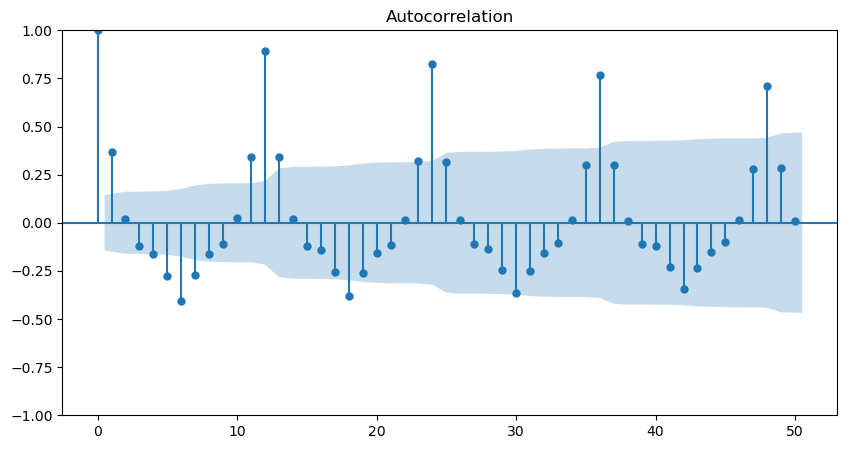

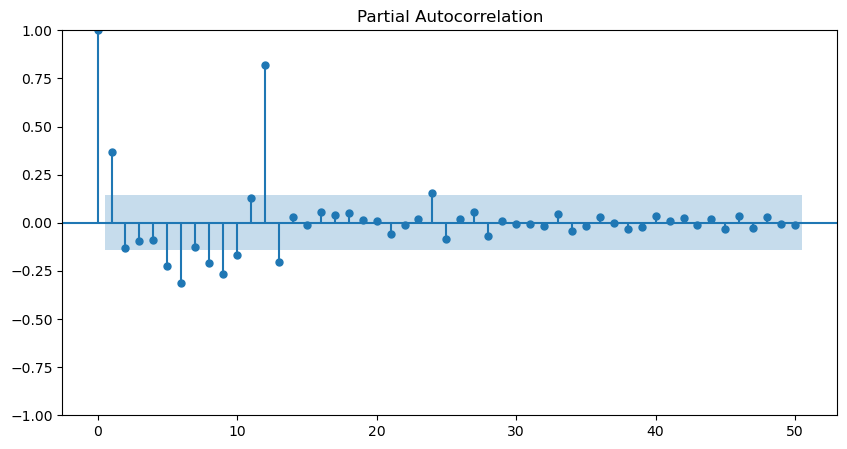

In [368]:
plt.figure(figsize=(5,5))
plot_acf(df2['Sparkling'],lags=50)
plot_pacf(df2['Sparkling'],lags=50)

plt.show()


<Figure size 500x500 with 0 Axes>

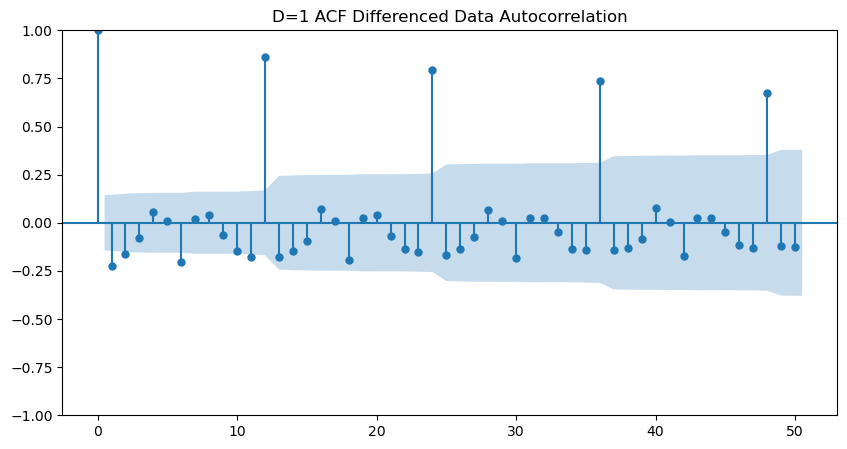

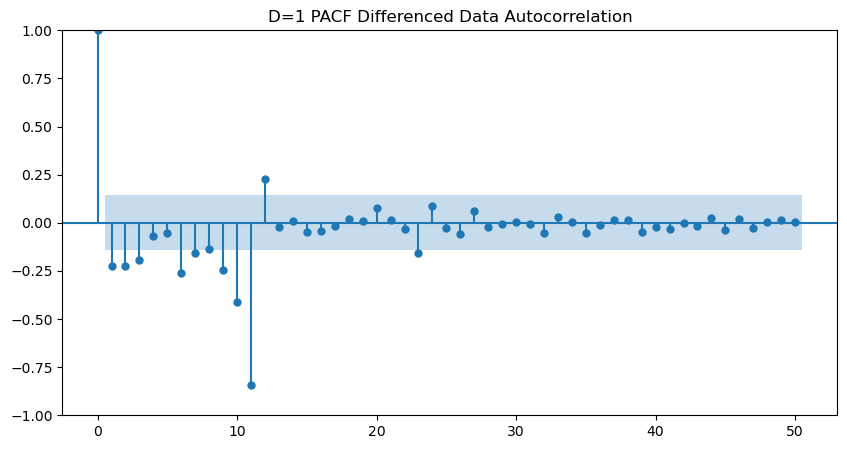

In [369]:
plt.figure(figsize=(5,5))
plot_acf(df2['Sparkling'].diff().dropna(),lags=50,title='D=1 ACF Differenced Data Autocorrelation')
plot_pacf(df2['Sparkling'].diff().dropna(),lags=50,title='D=1 PACF Differenced Data Autocorrelation')

plt.show()

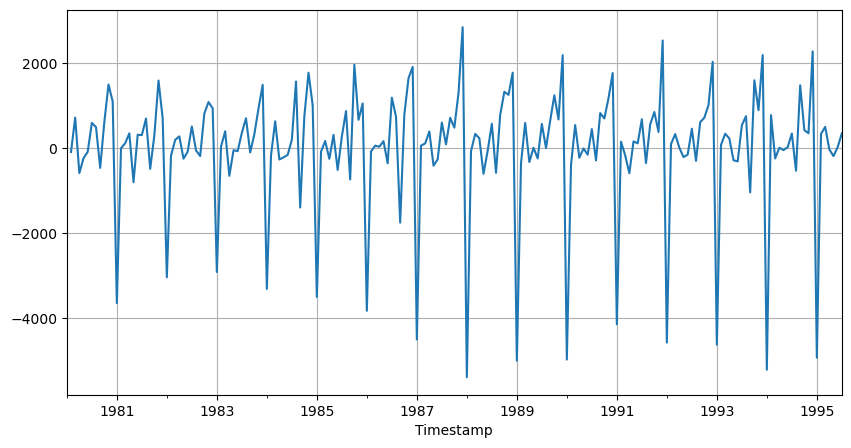

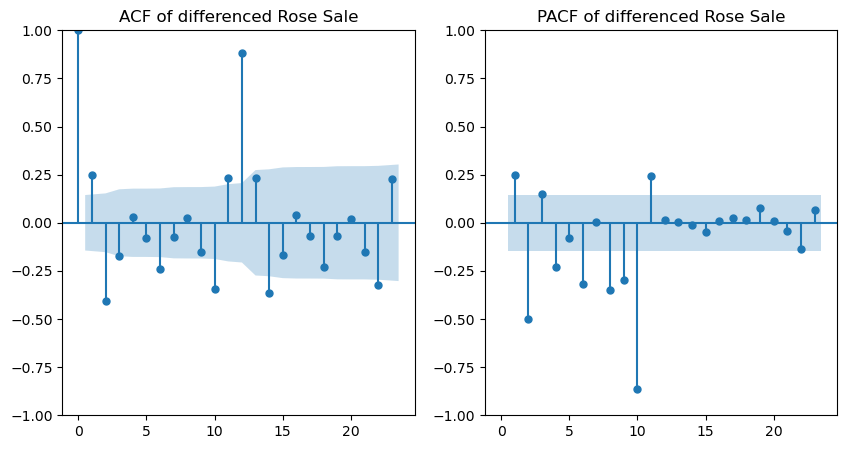

In [370]:


# Plot the first difference series, ACF and PACF of Log(Tractor Sales) 
df2['Sparkling'].diff().plot() 
plt.grid() 
# ACF and PACF after taking the differenced logarithmic transformation 
f,a = plt.subplots(1,2,sharex=True,sharey=False,squeeze=False) 
#Plotting the ACF and the PACF 
plot_0 = plot_acf(df2['Sparkling'].diff(2).dropna(),title='ACF of differenced Rose Sale',ax=a[0][0])
plot_1 = plot_pacf(df2['Sparkling'].diff(2).dropna(),title='PACF of differenced Rose Sale',zero = False,ax=a[0][1]);

## Manual SARIMA 

from acf and Pacf plot we can see that d = 1, p=1, q=3

thus (4,2,3)

we will do differencing again for seasonality PDQ




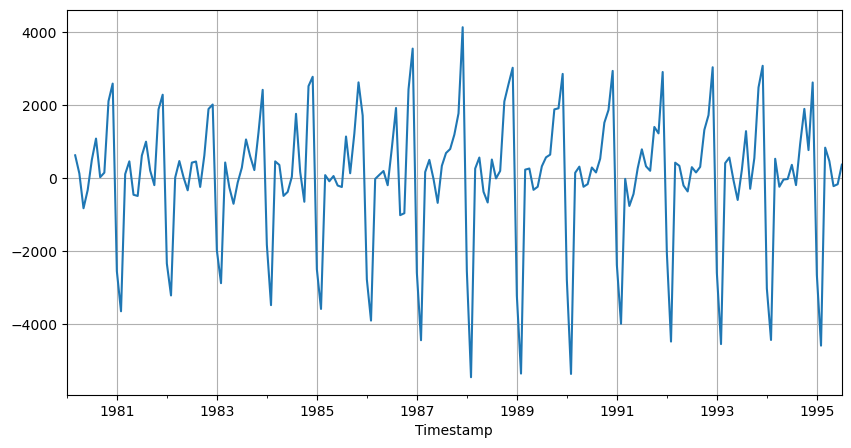

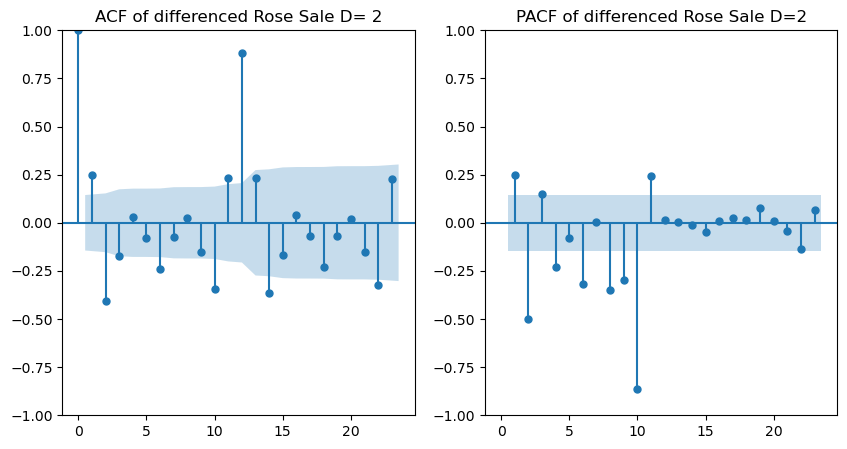

In [371]:
# Plot the first difference series, ACF and PACF of Log(Tractor Sales) 
df2['Sparkling'].diff(2).plot() 
plt.grid() 
# ACF and PACF after taking the differenced logarithmic transformation 
f,a = plt.subplots(1,2,sharex=True,sharey=False,squeeze=False) 
#Plotting the ACF and the PACF 
plot_0 = plot_acf(df2['Sparkling'].diff(2).dropna(),title='ACF of differenced Rose Sale D= 2',ax=a[0][0])
plot_1 = plot_pacf(df2['Sparkling'].diff(2).dropna(),title='PACF of differenced Rose Sale D=2',zero = False,ax=a[0][1]);

D=2 P=4 Q =3

Thus (4,2,3)

In [372]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 1),
                                seasonal_order=(4, 2, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                         SARIMAX Results                                          
Dep. Variable:                                          y   No. Observations:                  130
Model:             SARIMAX(3, 1, 1)x(4, 2, [1, 2, 3], 12)   Log Likelihood                -403.753
Date:                                    Mon, 22 Jul 2024   AIC                            831.506
Time:                                            19:37:35   BIC                            855.374
Sample:                                                 0   HQIC                           840.711
                                                    - 130                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1466      0.169      0.866      0

In [373]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

ValueError: Length of endogenous variable must be larger the the number of lags used in the model and the number of observations burned in the log-likelihood calculation.

<Figure size 1000x500 with 0 Axes>

### Predict Manual Sarima on Test Set

In [374]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [375]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  4482.920616  381.401792    3735.386840    5230.454391
1  7408.438011  387.670107    6648.618564    8168.257458
2  1676.653210  387.284946     917.588663    2435.717757
3  1485.905938  393.483226     714.692986    2257.118890
4  1995.085894  389.627884    1231.429274    2758.742514

In [376]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean)
print(rmse, mape)

722.5555697176263 18.683472828107362


In [377]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse], 'Test MAPE': [mape]}
                           ,index=['Manual SARIMA(3,1,1)(4,2,3,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

resultsDf.sort_values('Test RMSE')

Test RMSE  Test MAPE
Manual SARIMA(3,1,1)(4,2,3,12)   722.555570  18.683473
ARIMA(2,1,2)                    1325.154268  46.982274
Manual ARIMA(3,1,1)             1357.765923  37.590342

We see that there can be a seasonality of 2 as well as 12. But from the decompostion at the start we ascertained that visually it looks like the seasonality =12 and thus using the same

In [378]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [379]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [380]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC._append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2216.4189020489616
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1921.5151801498844
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1691.5049017310976
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1807.2950161665542
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1777.6492913876366
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1601.281534210607
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1618.9670228363275
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1617.7268547329668
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1602.062365958758
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2193.281680181417
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1888.5868794008513
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1658.7576059581322
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1768.1554049142383
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1704.8427340697406
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1536.3191139350608
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1575.249693559518
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1564.9149381065015
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1536.411010133245
SARIMA(0, 1, 2)

In [381]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 12)  1521.737955
80  (2, 1, 2)  (2, 0, 2, 12)  1523.217833
77  (2, 1, 2)  (1, 0, 2, 12)  1523.524946
26  (0, 1, 2)  (2, 0, 2, 12)  1523.707297
23  (0, 1, 2)  (1, 0, 2, 12)  1524.522125

In [382]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  130
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -752.869
Date:                            Mon, 22 Jul 2024   AIC                           1521.738
Time:                                    19:39:40   BIC                           1542.738
Sample:                                         0   HQIC                          1530.241
                                            - 130                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6466      0.268     -2.415      0.016      -1.171      -0.122
ma.L1          0.2835      0.300   

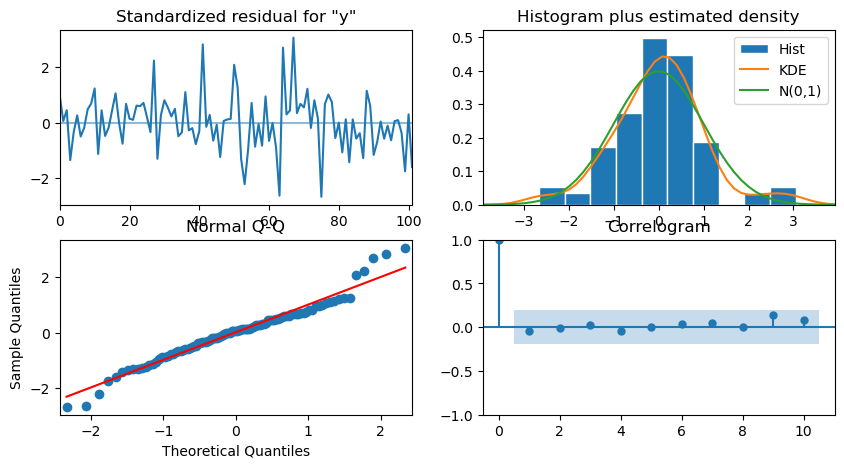

In [383]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots.

### Predict on the Test Set using this model and evaluate the model

In [384]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))


In [385]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  4695.761609  380.050103    3950.877094    5440.646124
1  7226.280924  388.908139    6464.034979    7988.526869
2  1584.334269  389.296992     821.326185    2347.342353
3  1417.261004  392.141388     648.678007    2185.844001
4  1828.623933  392.177956    1059.969264    2597.278603

In [386]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean)
print(rmse, mape)

712.661404885674 17.228023962108796


In [387]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse], 'Test MAPE': [mape]}
                           ,index=['SARIMA(1,1,2)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

resultsDf.sort_values('Test RMSE')

Test RMSE  Test MAPE
SARIMA(1,1,2)(2,0,2,12)          712.661405  17.228024
Manual SARIMA(3,1,1)(4,2,3,12)   722.555570  18.683473
ARIMA(2,1,2)                    1325.154268  46.982274
Manual ARIMA(3,1,1)             1357.765923  37.590342

We see that we have huge gain the RMSE value by including the seasonal parameters as well.

Please do refer to $\href{https://online.stat.psu.edu/stat510/lesson/4/4.1}{this\ link}$ to read more about Seasonal Auto-Regressive Integrtaed Moving Average Models.


#### This is where our model building exercise ends. 

Please do try out with 12 as a seasonal parameter and check whether that gives you a better RMSE value. Also, try taking different kinds of transformations as well.

Now, we will take our best model and forecast 12 months into the future with appropriate confidence intervals to see how the predictions look. We have to build our model on the full data for this.

### Building the most optimum model on the Full Data

## 6. Compare the performance of the models
- Compare the performance of all the models built - Choose the best model with proper rationale - Rebuild the best model using the entire data - Make a forecast for the next 12 months


In [388]:
full_data_model = sm.tsa.statespace.SARIMAX(df2['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 12)   Log Likelihood               -1172.687
Date:                            Mon, 22 Jul 2024   AIC                           2361.373
Time:                                    19:39:44   BIC                           2385.925
Sample:                                01-31-1980   HQIC                          2371.343
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6538      0.269     -2.430      0.015      -1.181      -0.126
ma.L1         -0.2791      0.222   

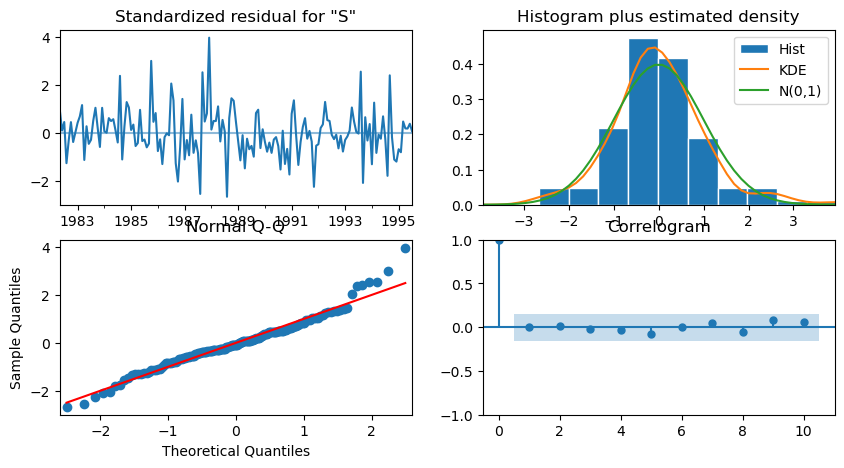

In [389]:
results_full_data_model.plot_diagnostics();

## Evaluate the model on the whole and predict 12 months into the future

In [390]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [391]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).tail()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1996-03-31  1813.890607  389.742478    1050.009387    2577.771826
1996-04-30  1787.936678  390.097447    1023.359731    2552.513624
1996-05-31  1628.737851  390.622855     863.131124    2394.344577
1996-06-30  1564.102691  391.032313     797.693442    2330.511941
1996-07-31  1998.291775  391.515000    1230.936476    2765.647074

In [393]:
rmse = mean_squared_error(df2['Sparkling'],results_full_data_model.fittedvalues,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_ARIMA)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 536.2110468386587


In [394]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

#dffinal = pred_full_manual_SARIMA_date.loc['1993-08-31':]

#dffinal.head()

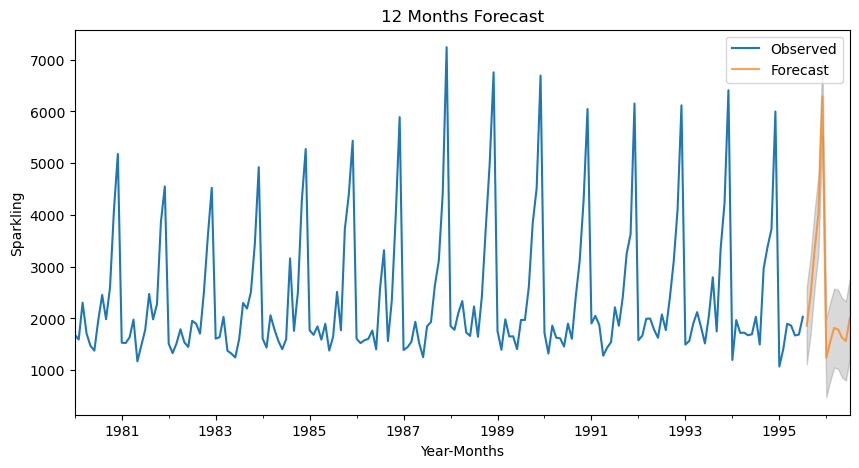

In [395]:
# plot the forecast along with the confidence band

axis = df2['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.title('12 Months Forecast')
plt.legend(loc='best')
plt.show()

In [396]:
resultsDf

Test RMSE  Test MAPE
Manual ARIMA(3,1,1)             1357.765923  37.590342
ARIMA(2,1,2)                    1325.154268  46.982274
Manual SARIMA(3,1,1)(4,2,3,12)   722.555570  18.683473
SARIMA(1,1,2)(2,0,2,12)          712.661405  17.228024

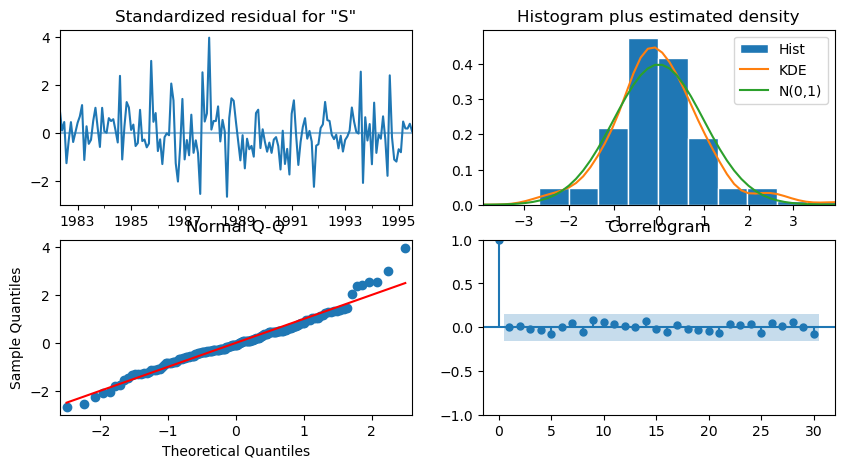

In [397]:
results_full_data_model.plot_diagnostics(lags=30, figsize=(10,5))

plt.show()

#### Note : <u>4 plots in the residuals diagnostic plots tell us</u> : 

- **Standardized residuals plot**: <i>The top left plot shows 1-step-ahead standardized residuals. 
    If model is working correctly, then no pattern should be obvious in the residuals which is clearly not visible from the plot as well .</i>



- **Histogram plus estimated density plot**: <i>This plot shows the distribution of the residuals.The orange line shows a smoothed version of this histogram, and the green line shows a normal distribution. If the model is good these two lines should be the same. Here there are small differences between them, which indicate that our model is doing just well enough.</i>



- **Normal Q-Q plot**: <i>The Q-Q plot compare the distribution of residuals to normal distribution. If the distribution of the residuals is normal, then all the points should lie along the red line, except for some values at the end, which is exactly happening in this case.</i>



- **Correlogram plot**: <i>The correlogram plot is the ACF plot of the residuals rather than the data. 95% of the correlations for lag >0  should not be significant (within the blue shades). If there is a significant correlation in the residuals, it means that there is information in the data that was not captured by the model, which is clearly not in this case</i> .

In [398]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test MAPE'])

Sorted by RMSE values on the Test Data: 



Test RMSE  Test MAPE
SARIMA(1,1,2)(2,0,2,12)          712.661405  17.228024
Manual SARIMA(3,1,1)(4,2,3,12)   722.555570  18.683473
Manual ARIMA(3,1,1)             1357.765923  37.590342
ARIMA(2,1,2)                    1325.154268  46.982274

### TES Best model



In [408]:
df2.tail()

Sparkling
Timestamp            
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [438]:
model_TES_alpha_i_j_k = ExponentialSmoothing(df2['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')
model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=.7,smoothing_trend=.4,smoothing_seasonal=.3,optimized=False,use_brute=True)
        
results_full_data_model  = model_TES_alpha_i_j_k.forecast(steps=12)


results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 12)   Log Likelihood               -1172.687
Date:                            Mon, 22 Jul 2024   AIC                           2361.373
Time:                                    20:05:13   BIC                           2385.925
Sample:                                01-31-1980   HQIC                          2371.343
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6538      0.269     -2.430      0.015      -1.181      -0.126
ma.L1         -0.2791      0.222   

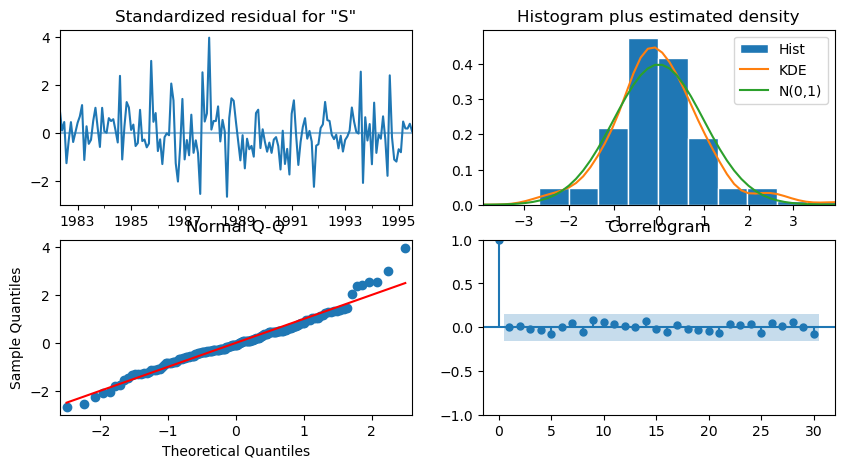

In [439]:
results_full_data_model.plot_diagnostics(lags=30, figsize=(10,5))

plt.show()

In [453]:
predicted_TES_full_data = results_full_data_model.get_forecast(steps=12)

predicted_TES_full_data


In [457]:

rmse = mean_squared_error(df2['Sparkling'],results_full_data_model.fittedvalues,squared=False)
mape = mean_absolute_percentage_error(df2['Sparkling'],predicted_auto_ARIMA)
print('RMSE of the Full Model',rmse.round(2),' \n', 'MAPE of Full Model',mape.round(2))

RMSE of the Full Model 536.21  
 MAPE of Full Model 46.98


In [442]:
pred_full_TES_date = predicted_TES_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

pred_full_TES_date

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  1857.462777  381.056643    1110.605480    2604.320073
1995-09-30  2457.713626  386.007042    1701.153727    3214.273525
1995-10-31  3317.330741  386.115418    2560.558428    4074.103055
1995-11-30  4018.974928  387.895292    3258.714127    4779.235729
1995-12-31  6289.748029  387.956007    5529.368227    7050.127831
1996-01-31  1238.538149  388.869777     476.367392    2000.708907
1996-02-29  1547.456208  389.111567     784.811551    2310.100865
1996-03-31  1813.890607  389.742478    1050.009387    2577.771826
1996-04-30  1787.936678  390.097447    1023.359731    2552.513624
1996-05-31  1628.737851  390.622855     863.131124    2394.344577
1996-06-30  1564.102691  391.032313     797.693442    2330.511941
1996-07-31  1998.291775  391.515000    1230.936476    2765.647074

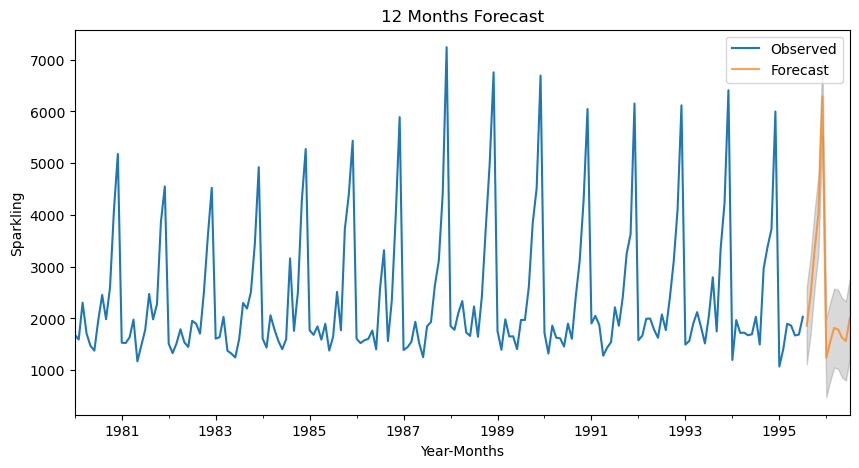

In [443]:
# plot the forecast along with the confidence band

axis = df2['Sparkling'].plot(label='Observed')
pred_full_TES_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_TES_date.index, pred_full_TES_date['mean_ci_lower'], 
                  pred_full_TES_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.title('12 Months Forecast')
plt.legend(loc='best')
plt.show()

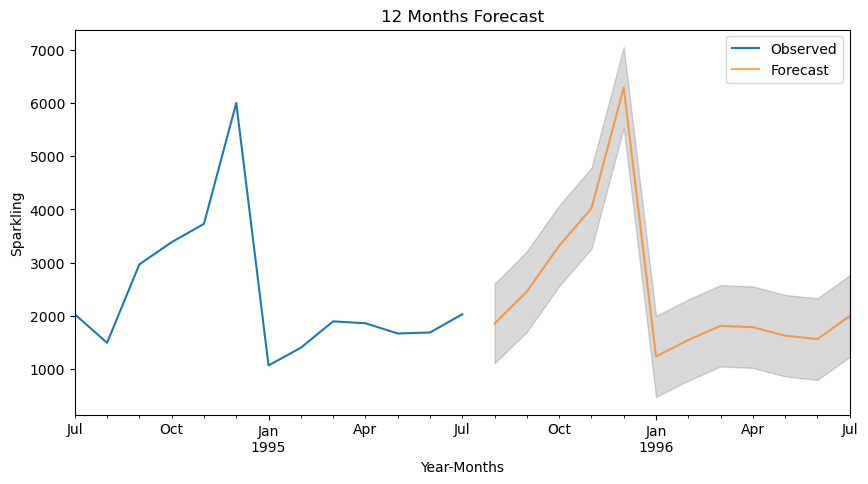

In [444]:

axis = df2['Sparkling']['1994-07-31':].plot(label='Observed')
pred_full_TES_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_TES_date.index, pred_full_TES_date['mean_ci_lower'], 
                  pred_full_TES_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.title('12 Months Forecast')
plt.legend(loc='best')
plt.show()